In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import glob
from scipy import optimize
from scipy.special import erf
import os
import numpy.polynomial.polynomial as poly
from scipy.stats import chisquare
from collections import OrderedDict

from collections import OrderedDict
import matplotlib.patches as mpatches


In [2]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

In [3]:
##################################################################
# [Percent Xe, Efield, Pressure, Drift time, Sigma, Marker]
##################################################################
Data = np.load("XenonHelium.npy")
#Data = np.loadtxt("XenonHelium.txt")

In [4]:
vals = Data[:,:-1].astype(float)
mark = Data[:,-1]

In [5]:
Percents = np.unique(vals[:,0])
Percents

array([ 85.,  90., 100.])

In [6]:
COL =['b','g','m','y','c','k','lime','orange','steelblue','pink','blue']


In [7]:
MB_Data = np.loadtxt("Full-XeHe-No4.txt")
Fractions = np.unique(MB_Data[:,0])[1:]
Fractions = [85,90,100]
mm = dict()
this = MB_Data[:,0]
for y in range(0,len(Fractions)):
    hold = []
    for x in range(0,len(this)):
        if this[x] == Fractions[y]:
            hold.append(MB_Data[x])
    mm[y] = np.array(hold)
    
Fractions

[85, 90, 100]

In [16]:
def MB_V(data,x):
    Vz = data[x][:,5]
    P  = data[x][:,3]/760
    E  = data[x][:,4]
    xe = str(data[x][0][0])
    ar = str(data[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Vz
    Yer =Vz*data[x][:,6]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]
    
    Xnew = np.linspace(0, 300, 10000)
    Ynew = np.interp(Xnew, X, Y)
    return Xnew,Ynew,Yer,lab
    
###                  11    , 12    ,    13   ,    14  ,  15 , 16 ]
###              LdiffTPC  ,LerrTPC, TdiffTCP, TerrTPC, Mele, Merr]
def MB_DLtpc(data,x):
    Vz = data[x][:,11]
    P  = data[x][:,3]/760
    E  = data[x][:,4]
    xe = str(data[x][0][0])
    ar = str(data[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Vz*np.sqrt(P)
    Yer =Vz*data[x][:,12]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]

    Xnew = np.linspace(0, 300, 1000)
    Ynew = np.interp(Xnew, X, Y)
    return Xnew,Ynew,Yer,lab

def MB_DTtpc(data,x):
    Vz = data[x][:,13]
    P  = data[x][:,3]/760
    E  = data[x][:,4]
    xe = str(data[x][0][0])
    ar = str(data[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Vz*np.sqrt(P)
    Yer =Vz*data[x][:,14]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]

    Xnew = np.linspace(0, 300, 1000)
    Ynew = np.interp(Xnew, X, Y)
    return Xnew,Ynew,Yer,lab

####################
###       [0    , 1    ,2    , 3   , 4     , 5     , 6   , 7    , 8   , 9    , 10  ,     11  , 12    ,  13 , 14 ]
###Vals = [XePer, ArPer, Temp, Pres, Efield, Zdrift, Zerr, Tdiff, Terr, Ldiff, Lerr, LdiffTPC,LerrTPC, Mele, Merr]
###                  11    , 12    ,    13   ,    14  ,  15 , 16 ]
###              LdiffTPC  ,LerrTPC, TdiffTCP, TerrTPC, Mele, Merr]
########
def MB_DL(data,x):
    Vz = data[x][:,9]
    P  = data[x][:,3]/760
    E  = data[x][:,4]
    xe = str(data[x][0][0])
    ar = str(data[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Vz*P
    Yer =Vz*data[x][:,10]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]

    Xnew = np.linspace(0, 300, 1000)
    Ynew = np.interp(Xnew, X, Y)
    return Xnew,Ynew,Yer,lab

def MB_DT(data,x):
    Vz = data[x][:,7]
    P  = data[x][:,3]/760
    E  = data[x][:,4]
    xe = str(data[x][0][0])
    ar = str(data[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Vz*P
    Yer =Vz*data[x][:,8]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]

    Xnew = np.linspace(0, 300, 1000)
    Ynew = np.interp(Xnew, X, Y)
    return Xnew,Ynew,Yer,lab

def CORRECTION(DT,Pres,Efid):
    P = Pres
    E = Efid
    gapwidth = .397/2
    d = 14.128 
    V = (d+gapwidth)/DT
    Pressures = P[E==300]
    CorrVals = gapwidth/V[E==300]
    CorrectionT = np.copy(P)
    for x in range(0,len(Pressures)):
        CorrectionT[CorrectionT==Pressures[x]] =CorrVals[x]
    dt = DT-CorrectionT
    return dt

def CORRECTION2(DT,Pres,Efid):
    P = Pres
    E = Efid
    gapwidth = .397
    d = 14.128 
    V = (d+gapwidth)/DT
    Pressures = P[E==300]
    CorrVals = gapwidth/V[E==300]
    CorrectionT = np.copy(P)
    for x in range(0,len(Pressures)):
        CorrectionT[CorrectionT==Pressures[x]] =CorrVals[x]
    dt = DT-CorrectionT
    cc  = CorrectionT
    return cc

def CORRECTION_SIG(DT,Pres,Efid,Sigma):
    P = Pres
    E = Efid
    t1 = CORRECTION2(DT,P,E)
    gapwidth = .397
    d = 14.128 
    dfull = d+gapwidth
    t2 = DT+0.5*t1
    D300 = Sigma[E==300]*dfull**2/(2*(t2[E==300])**3)
    
    sigmacor = np.sqrt(2*t1[E==300]**3*D300/gapwidth**2)
    Pressures = P[E==300]
    CorrectionT = np.copy(P)
    for x in range(0,len(Pressures)):
        CorrectionT[CorrectionT==Pressures[x]] =sigmacor[x]
    cc  = CorrectionT
    return cc

In [17]:
COL =['b','g','m','y','c','k','lime','orange','steelblue','pink','blue']
COL =['firebrick', 'steelblue', 'purple','darkblue']

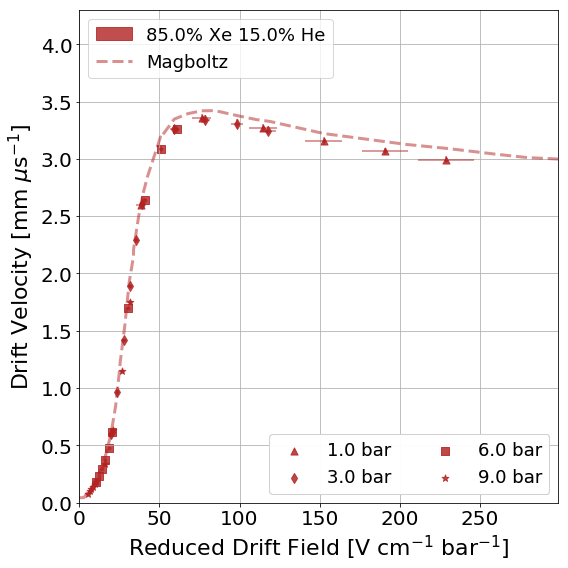

In [20]:
Pat = []
plt.figure(figsize=(8,8))
#for x in range(0,len(Percents)):
for x in [0]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 141.28
    P = vals[:,2]
    E = vals[:,1]#*.9767
    dt = vals[:,3]*1e6
    #V = d/(dt)
    cc = CORRECTION(dt,P,E)
    V = d/(cc)
    V = V
    R = E/P
    Verr = V * np.sqrt((0.5/dt)**2+(0.1/(d))**2)
    lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.8)
    Pat.append(pat)
    LABB = np.rint(P)#.astype(str)
    LABB[LABB == 5] =6
    LABB = LABB.astype(str)
    #LABB = LABB[LABB=='5.0'] =='6.0'
    MBX,MBY,Yer,lab = MB_V(mm,x)
    aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')
    B = (.1/(d))**2+(0.5/(dt))**2
    yer = V*np.sqrt((B))
    B = (.1/(E))**2+(0.1/(P))**2
    xer = R*np.sqrt((B))
    plt.errorbar(R, V,xerr=xer,yerr=yer, alpha=0.6,color=color,fmt='.')
    for x, y, m, L in zip(R, V, mark,LABB):
        plt.scatter(x, y, alpha=0.8,marker=m,color=color,s=50,label=L+" bar") 
    
    
Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='upper left',ncol=1,fontsize=18)
plt.gca().add_artist(legend1)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower right',ncol=2,fontsize=18)

plt.gca().add_artist(legend2)

#plt.scatter(XXX,YYY,color='lime')
#plt.plot(XX,YY,color='r')

plt.xlim(0,299)#
#plt.xlim(0,50)

plt.ylim(0,1.45)#
#plt.ylim(0,3.6)
plt.ylim(0,4.3)#
#
#plt.legend(loc='upper right',fontsize=14,ncol=3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.xlabel(r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=22)
plt.ylabel(r'Drift Velocity [mm $\mu$s$^{-1}$]',fontsize=22)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/085XE15HE-VEL"+".pdf")
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/090XE10HE-VEL"+".pdf")
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/100XE00HE-VEL"+".pdf")

plt.show()

In [12]:
V

array([2.60037329, 3.35407975, 3.26781971, 3.15486825, 3.06422221,
       2.99366417, 0.60245576, 0.96493906, 1.42171217, 1.88611761,
       2.28834186, 2.60397274, 3.25874043, 3.34146248, 3.30551933,
       3.24669333, 0.18251698, 0.23130876, 0.2920485 , 0.37100907,
       0.47562764, 0.61253059, 1.69864248, 2.63720061, 3.08309346,
       3.26066316, 0.07419743, 0.10256834, 0.12086544, 0.14004773,
       0.16039394, 0.18227268, 0.33420442, 0.63675369, 1.14860885,
       1.75402102])

In [122]:
LABB

array(['1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '3.0', '3.0', '3.0',
       '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '6.0', '6.0',
       '6.0', '6.0', '6.0', '6.0', '6.0', '6.0', '6.0', '6.0', '9.0',
       '9.0', '9.0', '9.0', '9.0', '9.0', '9.0', '9.0', '9.0', '9.0'],
      dtype='<U32')

In [13]:
V

array([0.96743113, 1.06082569, 1.13018987, 1.18725138, 1.23674627,
       1.28136371, 0.68248382, 0.88672795, 0.94442194, 0.98604772,
       1.02112401, 1.05282567, 0.19909453, 0.30009692, 0.41485967,
       0.52147565, 0.60717921, 0.6707592 , 0.81380667, 0.86531006,
       0.89821634, 0.92456306, 0.08871548, 0.11937506, 0.21828773,
       0.28719468, 0.36426948, 0.67250149, 0.79287847, 0.84443258,
       0.87529213])

In [14]:
LABB

array(['1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '3.0', '3.0', '3.0',
       '3.0', '3.0', '3.0', '6.0', '6.0', '6.0', '6.0', '6.0', '6.0',
       '6.0', '6.0', '6.0', '6.0', '9.0', '9.0', '9.0', '9.0', '9.0',
       '9.0', '9.0', '9.0', '9.0'], dtype='<U32')

In [15]:
ydata = np.array([1035.2102485, 2352.62259934, 2710.61508599, 2295.34380148, 1779.83462071, 1450.481533, 1207.04664208, 1135.44814476, 1135.44814476, 1063.84964743])
xdata = np.array([6.99752923,  9.33435791, 11.77311679, 14.00254669, 16.2590174, 18.62893625, 23.30874851, 28.02007787, 32.62235471, 37.2778078])
yerr  = [93.07804653, 257.75459038, 300.71368878, 236.27504118, 171.83639359, 157.51669412, 121.71744546, 157.51669412, 157.51669412, 136.03714492]
xerr  = [0.70687367, 0.97042257, 1.18612329, 1.41450378, 1.58181425, 1.83216528, 2.29242718, 2.83052125, 3.20842505, 3.7093128]

ydata1 = np.array([ 405.143472  ,  691.53746132,  992.2511501 , 1493.4406314, 1837.11341858, 2137.82710736, 2195.10590522, 2223.74530415, 1980.31041323, 1822.79371911, 1522.08003033, 1350.24363674, 1178.40724315, 1049.52994796, 1006.57084956])
xdata1 = np.array([ 6.17285059,  6.96028974,  7.95357495,  8.96817205, 10.058381, 10.92566347, 12.15614486, 12.95999085, 13.92802787, 15.04845665, 16.04356174, 17.15016567, 18.33309755, 19.2350124 , 20.02041098])
yerr1 = [ 62.05203102,  47.73233155,  47.73233155, 107.39774599, 178.99624332, 186.15609305, 176.60962674, 176.60962674, 157.51669412, 143.19699466, 157.51669412, 128.87729519, 105.01112942, 100.23789626, 100.23789626]
xerr1 = [0.37253454, 0.39567187, 0.50299237, 0.54027173, 0.6159662, 0.64337723, 0.67781644, 0.72650453, 0.8529399, 0.88143934, 0.93972603, 1.01796957, 1.13697022, 1.27030144, 1.20716751]
nextX = np.array([22.9,25.9,26.2,28.0,28.3,28.4,29.9,33.2,34.0,37.9,38.0,38.3,42.0,43.4,44.4,47.5,48.6,53.7,57.0])
nextY = np.array([1357.3, 1213.3, 1167.4, 1161.1, 1320.9, 1195.9, 1105.7, 1058.2, 1034.5, 979.1, 1129.4,
          988.6, 941.1, 939.6, 958.5, 1028.2, 901.6, 869.9, 903.2])

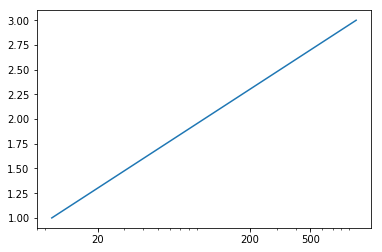

In [16]:
import matplotlib
from matplotlib import pyplot as plt
fig1, ax1 = plt.subplots()
ax1.plot([10, 100, 1000], [1,2,3])
ax1.set_xscale('log')
ax1.set_xticks([20, 200, 500])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

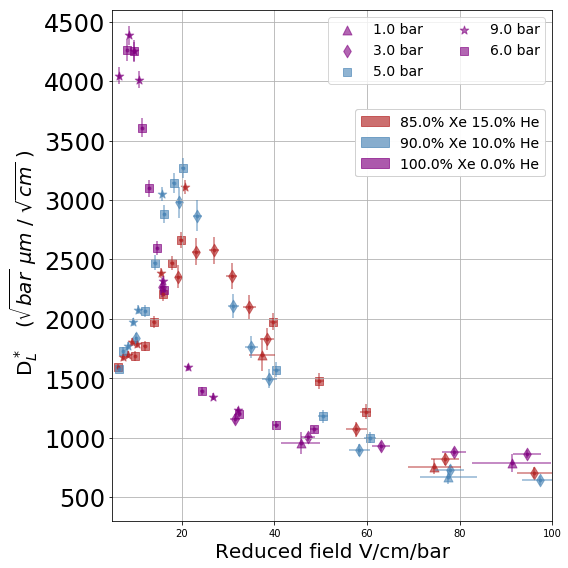

In [21]:
Pat = []
#plt.figure(figsize=(8,8))

fig1, ax1 = plt.subplots(figsize=(8,8))
for x in range(0,len(Percents)):
#for x in [2]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 14.128
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    sigma = (vals[:,4]*1e6)**2
    V = d/(dt)
    cc = CORRECTION(dt,P,E)
    V = d/(cc)
    R = E*.9767/P
    Dslash = sigma*V**3/(2*d)*1e6*P
    dell = np.where(Dslash>6000)[0]
    Dstar  = np.sqrt(2*Dslash/V)*10
    Dslash = np.delete(Dslash,dell)
    Dstar = np.delete(Dstar,dell)
    sigma = np.delete(sigma,dell)
    R = np.delete(R,dell)
    E = np.delete(E,dell)
    P = np.delete(P,dell)
    V = np.delete(V,dell)
    dt = np.delete(dt,dell)
    B = (.01/(sigma))**2+9*(0.5/dt)**2+4*(0.1/(d))**2+(0.1/(P))**2
    DeltaD = Dstar*np.sqrt((B))
    
    B = (.1/(E))**2+(0.1/(P))**2
    xer = R*np.sqrt((B))
    
    SORT = R.argsort()
    lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    plt.errorbar(R, Dstar,xerr=xer,yerr=DeltaD, alpha=0.6,color=color,fmt='.')
    #MBX,MBY,Yer,lab = MB_DLtpc(mm,x)
    #plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color='r')
    #lb2 = mpatches.Patch(color='r', label='Magboltz',alpha=0.5)

    for x, y, m, L in zip(R, Dstar, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=14)

#Pat.append(lb1)
#Pat.append(lb2)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.74),ncol=1,fontsize=14)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


#plt.semilogx()
plt.xlim(5,100)#
#plt.xlim(0,100)
plt.ylim(300,4600)#
#plt.legend(loc='upper right',fontsize=14,ncol=3)
#plt.xticks([100,150,200,250],fontsize=24)

#ax1.set_xscale('log')
#ax1.set_xticks([6,10,20,50,100,250])
#ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel("Reduced field V/cm/bar",fontsize=20)
plt.ylabel(r" D$^*_L$   ($\sqrt{bar}$ $\mu m$ / $\sqrt{cm}$ )",fontsize=20)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/100XE00HE-diff-zoom"+".pdf")
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/100XE00HE-diff"+".pdf")
#plt.axvline(13)
plt.show()

In [ ]:
Pat = []
plt.figure(figsize=(8,8))
#for x in range(0,len(Percents)):
for x in [2]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 14.128
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    sigma = (vals[:,4]*1e6)**2
    V = d/(dt)
    R = E*.9767/P
    Dslash = sigma*V**3/(2*d)*1e6*P
    Dstar  = np.sqrt(2*Dslash/V)*10
    
    B = (.01/(sigma))**2+9*(0.5/dt)**2+4*(0.1/(d))**2+(0.1/(P))**2
    
    DeltaD = Dslash*np.sqrt((B))
    
    SORT = R.argsort()
    lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    #plt.plot(R[SORT], Dslash[SORT], alpha=0.6,color=color)
    plt.errorbar(R, Dstar,yerr=DeltaD+Dslash*0.1, alpha=0.6,color=color,fmt='.')
    
    #MBX,MBY,Yer,lab = MB_DLtpc(mm,x)
    #plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color='r')
    #lb2 = mpatches.Patch(color='r', label='Magboltz',alpha=0.5)

    for x, y, m, L in zip(R, Dstar, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=3,fontsize=14)

#Pat.append(lb1)
Pat.append(lb2)
legend1=plt.legend(handles=Pat,loc='center right',ncol=1,fontsize=14)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(0,300)#
#plt.xlim(0,100)
plt.ylim(0,5000)#
#plt.legend(loc='upper right',fontsize=14,ncol=3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel("Reduced field V/cm/bar",fontsize=20)
plt.ylabel(r" D$^*_L$ conversion   ($\sqrt{bar}$ $\mu m$ / $\sqrt{cm}$ )",fontsize=20)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/100XE00HE-diff-zoom"+".pdf")
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/100XE00HE-diff"+".pdf")
#plt.axvline(13)
plt.show()

In [238]:
np.sqrt((B))

array([0.11796633, 0.13924428, 0.14649895, 0.15218101, 0.15328328,
       0.04011724, 0.04035138, 0.04088809, 0.04220829, 0.04527318,
       0.05106252, 0.10645392, 0.14864511, 0.17837613, 0.18705524,
       0.02101534, 0.02102377, 0.02103961, 0.0210719 , 0.02113759,
       0.02126345, 0.02594068, 0.05807811, 0.1087247 , 0.15098732,
       0.011368  , 0.01137071, 0.01137326, 0.01137691, 0.01138089,
       0.01138661, 0.01146833, 0.01197156, 0.01438037, 0.02141281])

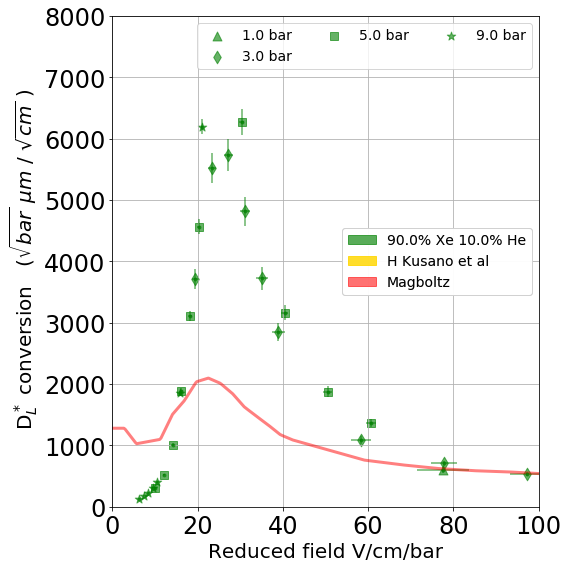

In [341]:
Pat = []
plt.figure(figsize=(8,8))
#for x in range(0,len(Percents)):
for x in [1]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 14.128
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    sigma = (vals[:,4]*1e6)**2
    V = d/(dt)
    R = E*.9767/P
    Dslash = sigma*V**3/(2*d)*1e6*P
    #Dstar  = np.sqrt(2*Dslash/V)*10
    
    B = (.01/(sigma))**2+9*(0.5/dt)**2+4*(0.1/(d))**2+(0.1/(P))**2
    
    DeltaD = Dslash*np.sqrt((B))
    
    #B = (.1/(2*sigma))**2+(0.5/dt)**2+(0.1/(2*d))**2+(0.1/(P))**2
    #DeltaD = Dstar*np.sqrt((B))
    B = (.1/(E))**2+(0.1/(P))**2
    xer = R*np.sqrt((B))

    SORT = R.argsort()
    lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    #plt.plot(R[SORT], Dslash[SORT], alpha=0.6,color=color)
    plt.errorbar(R, Dslash,xerr=xer,yerr=DeltaD, alpha=0.6,color=color,fmt='.')
    
    MBX,MBY,Yer,lab = MB_DLtpc(mm,x)
    plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color='r')
    lb2 = mpatches.Patch(color='r', label='Magboltz',alpha=0.5)

    for x, y, m, L in zip(R, Dslash, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=3,fontsize=14)

Pat.append(lb1)
Pat.append(lb2)
legend1=plt.legend(handles=Pat,loc='center right',ncol=1,fontsize=14)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(0,300)#
plt.xlim(0,100)
plt.ylim(0,8000)#
#plt.legend(loc='upper right',fontsize=14,ncol=3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel("Reduced field V/cm/bar",fontsize=20)
plt.ylabel(r" D$^*_L$ conversion   ($\sqrt{bar}$ $\mu m$ / $\sqrt{cm}$ )",fontsize=20)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/100XE00HE-diff-zoom"+".pdf")
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/100XE00HE-diff"+".pdf")
#plt.axvline(13)
plt.show()

In [319]:
P

array([1.26, 1.26, 1.26, 1.26, 1.26, 2.51, 2.51, 2.51, 2.51, 2.51, 2.51,
       2.51, 2.51, 2.51, 2.51, 4.83, 4.83, 4.83, 4.83, 4.83, 4.83, 4.83,
       4.83, 4.83, 4.83, 9.26, 9.26, 9.26, 9.26, 9.26, 9.26, 9.26, 9.26,
       9.26, 9.26])

In [324]:
E

array([100., 150., 200., 250., 300.,  50.,  60.,  70.,  80.,  90., 100.,
       150., 200., 250., 300.,  50.,  60.,  70.,  80.,  90., 100., 150.,
       200., 250., 300.,  50.,  60.,  70.,  80.,  90., 100., 150., 200.,
       250., 300.])

In [323]:
dt

array([  49.45372761,   52.11640547,   54.28630023,   55.87720103,
         57.09029104,  166.18268608,  102.19302888,   74.71779164,
         62.10864923,   55.82240377,   52.47689284,   48.8446134 ,
         49.80123915,   51.18370334,   52.46547012,  757.79174074,
        573.06250754,  424.14231609,  306.92301277,  221.20231706,
        162.62948432,   66.17735134,   52.18419973,   49.35742727,
         49.02810177, 1715.4405368 , 1396.01440931, 1178.79372135,
       1009.24996435,  871.77162164,  755.98924612,  350.0048513 ,
        155.7566165 ,   88.51512913,   65.37723376])

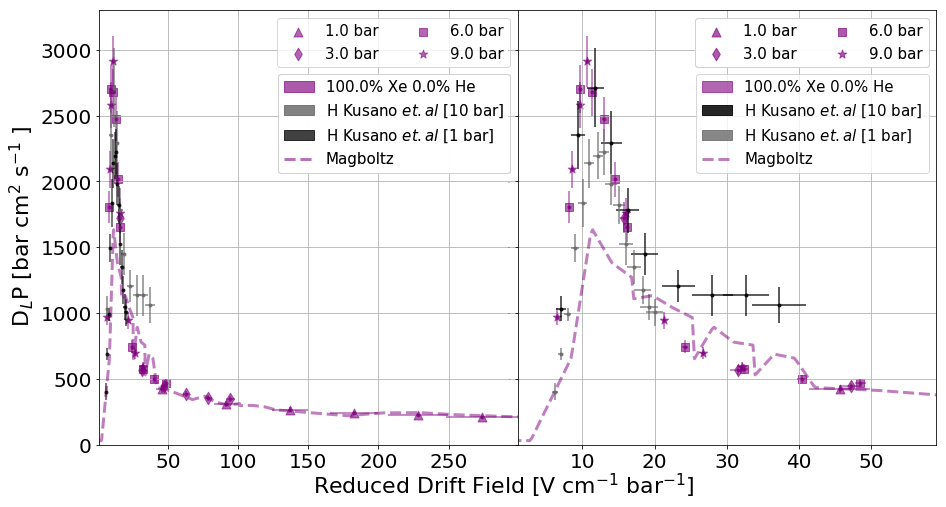

In [339]:
FFF = 13
fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(hspace=0, wspace=0)
################################################################################
################################################################################
Pat = []
x=2
ax1 = fig.add_subplot(1, 2,1)
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 14.128
E = vals[:,1]
P = vals[:,2]
dt = vals[:,3]*1e6
#sigma = (vals[:,4]*1e6)**2
sigma1 = (vals[:,4]*1e6)**2
Sigcc = CORRECTION_SIG(dt,P,E,sigma1)
sigma = (vals[:,4]*1e6)**2-Sigcc-(0.01527)**2

V = d/(dt)
cc = CORRECTION(dt,P,E)
V = d/(cc)
R = E*.9767/P
Dslash = sigma*V**3/(2*d)*1e6*P
#Dstar  = np.sqrt(2*Dslash/V)*10
B = (.01/(2*sigma))**2+(0.5/dt)**2+(0.1/(2*d))**2+(0.1/(P))**2
B = (.062)**2+(3*4.6e-3)**2+(2*0.01)**2
DeltaD = Dslash*np.sqrt((B))
B = (.1/(E))**2+(0.1/(P))**2
xer = R*np.sqrt((B))
SORT = R.argsort()
lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
color = COL[x]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
Pat.append(pat)
LABB = np.rint(P).astype(str)

plt.errorbar(R, Dslash,xerr=xer,yerr=DeltaD, alpha=0.6,color=color,fmt='.')

MBX,MBY,Yer,lab = MB_DL(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

for x, y, m, L in zip(R, Dslash, mark,LABB):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 


plt.errorbar(xdata,ydata,xerr=xerr,yerr=yerr,fmt='.',color='dimgrey',alpha=0.8)
lb1 = mpatches.Patch(color='dimgrey', label=r'H Kusano $\it{et. al}$ [10 bar]',alpha=0.8)


plt.errorbar(xdata1,ydata1,xerr=xerr1,yerr=yerr1,fmt='.',color='k',alpha=0.7)
lb3 = mpatches.Patch(color='k', label=r'H Kusano $\it{et. al}$ [1 bar]',alpha=0.7)


#plt.plot(XX,YY,color='r',label="Magboltz",alpha=0.8)
   
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)

Pat.append(lb1)
Pat.append(lb3)

Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.74),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(1,299)
plt.ylim(501,4900)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

################################################################################
################################################################################
Pat = []
x=2
ax2 = fig.add_subplot(1, 2,2,sharey=ax1)
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 14.128
E = vals[:,1]
P = vals[:,2]
dt = vals[:,3]*1e6
#sigma = (vals[:,4]*1e6)**2
sigma1 = (vals[:,4]*1e6)**2
Sigcc = CORRECTION_SIG(dt,P,E,sigma1)
sigma = (vals[:,4]*1e6)**2-Sigcc-(0.01527)**2

V = d/(dt)
cc = CORRECTION(dt,P,E)
V = d/(cc)
R = E*.9767/P
Dslash = sigma*V**3/(2*d)*1e6*P
#Dstar  = np.sqrt(2*Dslash/V)*10

B = (.1/(2*sigma))**2+(0.5/dt)**2+(0.1/(2*d))**2+(0.1/(P))**2
B = (.062)**2+(3*4.6e-3)**2+(2*0.01)**2
DeltaD = Dslash*np.sqrt((B))
B = (.1/(E))**2+(0.1/(P))**2
xer = R*np.sqrt((B))
SORT = R.argsort()
lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
color = COL[x]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
Pat.append(pat)
LABB = np.rint(P).astype(str)

plt.errorbar(R, Dslash,xerr=xer,yerr=DeltaD, alpha=0.6,color=color,fmt='.')

MBX,MBY,Yer,lab = MB_DL(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')
#lb2 = mpatches.Patch(color='r', label='Magboltz',alpha=0.5)

for x, y, m, L in zip(R, Dslash, mark,LABB):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 

plt.errorbar(xdata,ydata,xerr=xerr,yerr=yerr,fmt='.',color='k',alpha=0.85)
lb1 = mpatches.Patch(color='k', label=r'H Kusano $\it{et. al}$ [10 bar]',alpha=0.85)

plt.errorbar(xdata1,ydata1,xerr=xerr1,yerr=yerr1,fmt='.',color='dimgrey',alpha=0.8)
lb3 = mpatches.Patch(color='dimgrey', label=r'H Kusano $\it{et. al}$ [1 bar]',alpha=0.8)


Pat.append(lb1)
Pat.append(lb3)

Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.74),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)


plt.gca().add_artist(legend2)


plt.xlim(1,59)
plt.ylim(0,3300)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=0)


fig.text(0.5, 0.04, r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=22, ha='center')
fig.text(0.04, 0.5, r" D$_L$P [bar cm$^2$ s$^{-1}$ ]",fontsize=22, va='center', rotation='vertical')


#plt.tight_layout()
#fig.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/100XE00HE-DIFL"+".pdf")
plt.show()

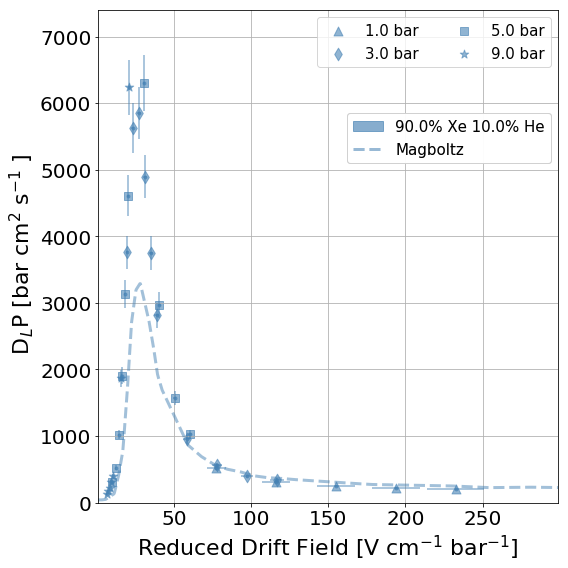

In [331]:
FFF = 13
fig = plt.figure(figsize=(8,8))
#fig.subplots_adjust(hspace=0, wspace=0)
################################################################################
################################################################################
Pat = []
x=1
ax1 = plt.gca()#fig.add_subplot(1, 2,1)
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 14.128
E = vals[:,1]
P = vals[:,2]
dt = vals[:,3]*1e6
#sigma = (vals[:,4]*1e6)**2

sigma1 = (vals[:,4]*1e6)**2
Sigcc = CORRECTION_SIG(dt,P,E,sigma1)
sigma = (vals[:,4]*1e6)**2-Sigcc-(0.01527)**2

V = d/(dt)
cc = CORRECTION(dt,P,E)
V = d/(cc)
R = E*.9767/P
Dslash = sigma*V**3/(2*d)*1e6*P
#Dstar  = np.sqrt(2*Dslash/V)*10
B = (.01/(2*sigma))**2+(0.5/dt)**2+(0.1/(2*d))**2+(0.1/(P))**2
B = (.062)**2+(3*4.6e-3)**2+(2*0.01)**2
DeltaD = Dslash*np.sqrt((B))
B = (.1/(E))**2+(0.1/(P))**2
xer = R*np.sqrt((B))
SORT = R.argsort()
lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
color = COL[x]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
Pat.append(pat)
LABB = np.rint(P).astype(str)

plt.errorbar(R, Dslash,xerr=xer,yerr=DeltaD, alpha=0.6,color=color,fmt='.')

MBX,MBY,Yer,lab = MB_DL(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

for x, y, m, L in zip(R, Dslash, mark,LABB):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)

Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.74),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(1,299)
plt.ylim(501,4900)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

################################################################################

plt.ylim(0,7400)
plt.xlabel( r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=22)
plt.ylabel(r" D$_L$P [bar cm$^2$ s$^{-1}$ ]",fontsize=22,)
#fig.text(0.32, 0.04, r'Reduced Drift Field [V cm$^{-1}$ Bar$^{-1}$]',fontsize=22, ha='center')
#fig.text(0.04, 0.5, r" D$_L$P [bar cm$^2$ $\mu$s$^{-1}$ ]",fontsize=22, va='center', rotation='vertical')


plt.tight_layout()
#fig.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/090XE10HE-DIFL"+".pdf")
plt.show()

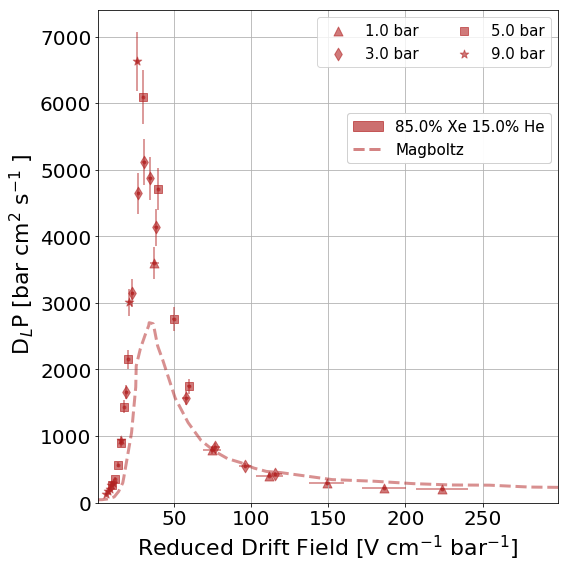

In [338]:
FFF = 13
fig = plt.figure(figsize=(8,8))
#fig.subplots_adjust(hspace=0, wspace=0)
################################################################################
################################################################################
Pat = []
x=0
ax1 = plt.gca()#fig.add_subplot(1, 2,1)
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 14.128
E = vals[:,1]
P = vals[:,2]
dt = vals[:,3]*1e6
#sigma = (vals[:,4]*1e6)**2
sigma1 = (vals[:,4]*1e6)**2
Sigcc = CORRECTION_SIG(dt,P,E,sigma1)
sigma = (vals[:,4]*1e6)**2-Sigcc-(0.01527)**2

V = d/(dt)
cc = CORRECTION(dt,P,E)
V = d/(cc)
R = E*.9767/P
Dslash = sigma*V**3/(2*d)*1e6*P
#Dstar  = np.sqrt(2*Dslash/V)*10
B = (.01/(2*sigma))**2+(0.5/dt)**2+(0.1/(2*d))**2+(0.1/(P))**2
B = (.062)**2+(3*4.6e-3)**2+(2*0.01)**2
DeltaD = Dslash*np.sqrt((B))
B = (.1/(E))**2+(0.1/(P))**2
xer = R*np.sqrt((B))
SORT = R.argsort()
lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
color = COL[x]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
Pat.append(pat)
LABB = np.rint(P).astype(str)

plt.errorbar(R, Dslash,xerr=xer,yerr=DeltaD, alpha=0.6,color=color,fmt='.')

MBX,MBY,Yer,lab = MB_DL(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

for x, y, m, L in zip(R, Dslash, mark,LABB):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)

Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.74),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(1,299)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

################################################################################


plt.ylim(0,7400)
plt.xlabel( r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=22)
plt.ylabel(r" D$_L$P [bar cm$^2$ s$^{-1}$ ]",fontsize=22,)
plt.tight_layout()
#fig.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/085XE15HE-DIFL"+".pdf")
plt.show()

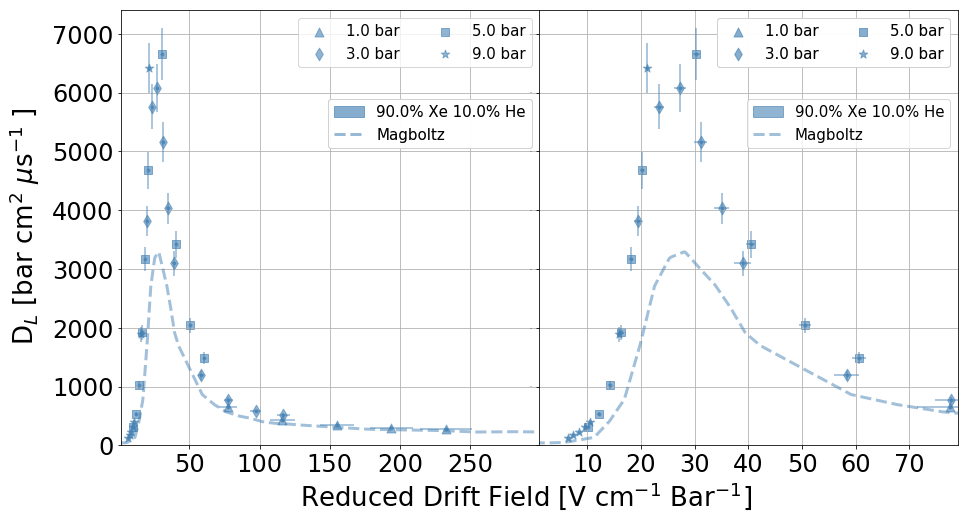

In [34]:
FFF = 13
fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(hspace=0, wspace=0)
################################################################################
################################################################################
Pat = []
x=1
ax1 = fig.add_subplot(1, 2,1)
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 14.128
E = vals[:,1]
P = vals[:,2]
dt = vals[:,3]*1e6
sigma = (vals[:,4]*1e6)**2
V = d/(dt)
cc = CORRECTION(dt,P,E)
V = d/(cc)
R = E*.9767/P
Dslash = sigma*V**3/(2*d)*1e6*P
#Dstar  = np.sqrt(2*Dslash/V)*10
B = (.01/(2*sigma))**2+(0.5/dt)**2+(0.1/(2*d))**2+(0.1/(P))**2
B = (.062)**2+(3*4.6e-3)**2+(2*0.01)**2
DeltaD = Dslash*np.sqrt((B))
B = (.1/(E))**2+(0.1/(P))**2
xer = R*np.sqrt((B))
SORT = R.argsort()
lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
color = COL[x]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
Pat.append(pat)
LABB = np.rint(P).astype(str)

plt.errorbar(R, Dslash,xerr=xer,yerr=DeltaD, alpha=0.6,color=color,fmt='.')

MBX,MBY,Yer,lab = MB_DL(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

for x, y, m, L in zip(R, Dslash, mark,LABB):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)

Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.74),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(1,299)
plt.ylim(501,4900)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

################################################################################
################################################################################
Pat = []
x=1
ax2 = fig.add_subplot(1, 2,2,sharey=ax1)
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 14.128
E = vals[:,1]
P = vals[:,2]
dt = vals[:,3]*1e6
sigma = (vals[:,4]*1e6)**2
V = d/(dt)
cc = CORRECTION(dt,P,E)
V = d/(cc)
R = E*.9767/P
Dslash = sigma*V**3/(2*d)*1e6*P
#Dstar  = np.sqrt(2*Dslash/V)*10

B = (.01/(2*sigma))**2+(0.5/dt)**2+(0.1/(2*d))**2+(0.1/(P))**2
B = (.062)**2+(3*4.6e-3)**2+(2*0.01)**2
DeltaD = Dslash*np.sqrt((B))
B = (.1/(E))**2+(0.1/(P))**2
xer = R*np.sqrt((B))
SORT = R.argsort()
lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
color = COL[x]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
Pat.append(pat)
LABB = np.rint(P).astype(str)

plt.errorbar(R, Dslash,xerr=xer,yerr=DeltaD, alpha=0.6,color=color,fmt='.')

MBX,MBY,Yer,lab = MB_DL(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')
#lb2 = mpatches.Patch(color='r', label='Magboltz',alpha=0.5)

for x, y, m, L in zip(R, Dslash, mark,LABB):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 

Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.74),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)


plt.gca().add_artist(legend2)


plt.xlim(1,79)
plt.ylim(0,7400)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=0)


fig.text(0.5, 0.02, r'Reduced Drift Field [V cm$^{-1}$ Bar$^{-1}$]',fontsize=26, ha='center')
fig.text(0.02, 0.5, r" D$_L$ [bar cm$^2$ $\mu$s$^{-1}$ ]",fontsize=26, va='center', rotation='vertical')


#plt.tight_layout()
#fig.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/090XE10HE-DIFL"+".pdf")
plt.show()

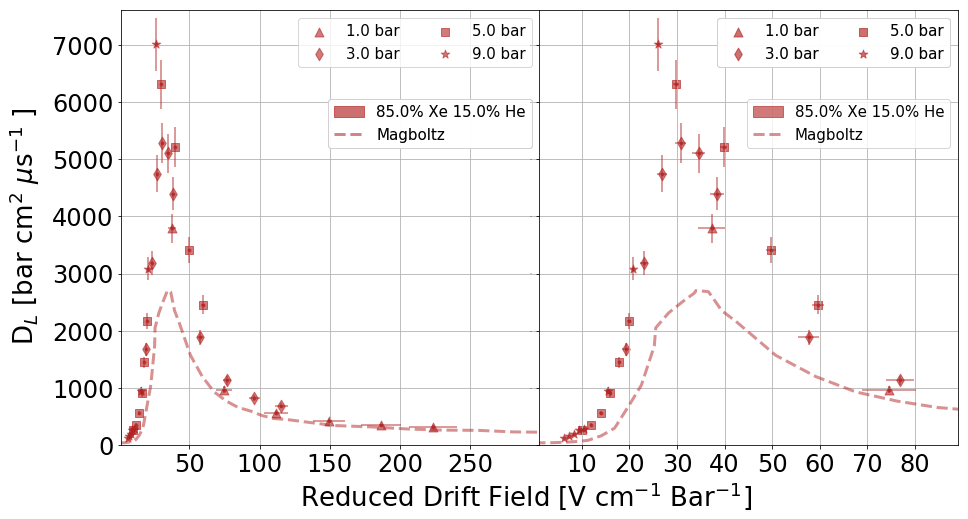

In [37]:
FFF = 13
fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(hspace=0, wspace=0)
################################################################################
################################################################################
Pat = []
x=0
ax1 = fig.add_subplot(1, 2,1)
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 14.128
E = vals[:,1]
P = vals[:,2]
dt = vals[:,3]*1e6
sigma = (vals[:,4]*1e6)**2
V = d/(dt)
cc = CORRECTION(dt,P,E)
V = d/(cc)
R = E*.9767/P
Dslash = sigma*V**3/(2*d)*1e6*P
#Dstar  = np.sqrt(2*Dslash/V)*10
B = (.01/(2*sigma))**2+(0.5/dt)**2+(0.1/(2*d))**2+(0.1/(P))**2
B = (.062)**2+(3*4.6e-3)**2+(2*0.01)**2
DeltaD = Dslash*np.sqrt((B))
B = (.1/(E))**2+(0.1/(P))**2
xer = R*np.sqrt((B))
SORT = R.argsort()
lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
color = COL[x]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
Pat.append(pat)
LABB = np.rint(P).astype(str)

plt.errorbar(R, Dslash,xerr=xer,yerr=DeltaD, alpha=0.6,color=color,fmt='.')

MBX,MBY,Yer,lab = MB_DL(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

for x, y, m, L in zip(R, Dslash, mark,LABB):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)

Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.74),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(1,299)
plt.ylim(501,4900)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

################################################################################
################################################################################
Pat = []
x=0
ax2 = fig.add_subplot(1, 2,2,sharey=ax1)
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 14.128
E = vals[:,1]
P = vals[:,2]
dt = vals[:,3]*1e6
sigma = (vals[:,4]*1e6)**2
V = d/(dt)
cc = CORRECTION(dt,P,E)
V = d/(cc)
R = E*.9767/P
Dslash = sigma*V**3/(2*d)*1e6*P
#Dstar  = np.sqrt(2*Dslash/V)*10

B = (.01/(2*sigma))**2+(0.5/dt)**2+(0.1/(2*d))**2+(0.1/(P))**2
B = (.062)**2+(3*4.6e-3)**2+(2*0.01)**2
DeltaD = Dslash*np.sqrt((B))
B = (.1/(E))**2+(0.1/(P))**2
xer = R*np.sqrt((B))
SORT = R.argsort()
lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
color = COL[x]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
Pat.append(pat)
LABB = np.rint(P).astype(str)

plt.errorbar(R, Dslash,xerr=xer,yerr=DeltaD, alpha=0.6,color=color,fmt='.')

MBX,MBY,Yer,lab = MB_DL(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')
#lb2 = mpatches.Patch(color='r', label='Magboltz',alpha=0.5)

for x, y, m, L in zip(R, Dslash, mark,LABB):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 

Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.74),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)


plt.gca().add_artist(legend2)


plt.xlim(1,89)
plt.ylim(0,7600)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=0)


fig.text(0.5, 0.02, r'Reduced Drift Field [V cm$^{-1}$ Bar$^{-1}$]',fontsize=26, ha='center')
fig.text(0.02, 0.5, r" D$_L$ [bar cm$^2$ $\mu$s$^{-1}$ ]",fontsize=26, va='center', rotation='vertical')


#plt.tight_layout()
#fig.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/085XE15HE-DIFL"+".pdf")
plt.show()

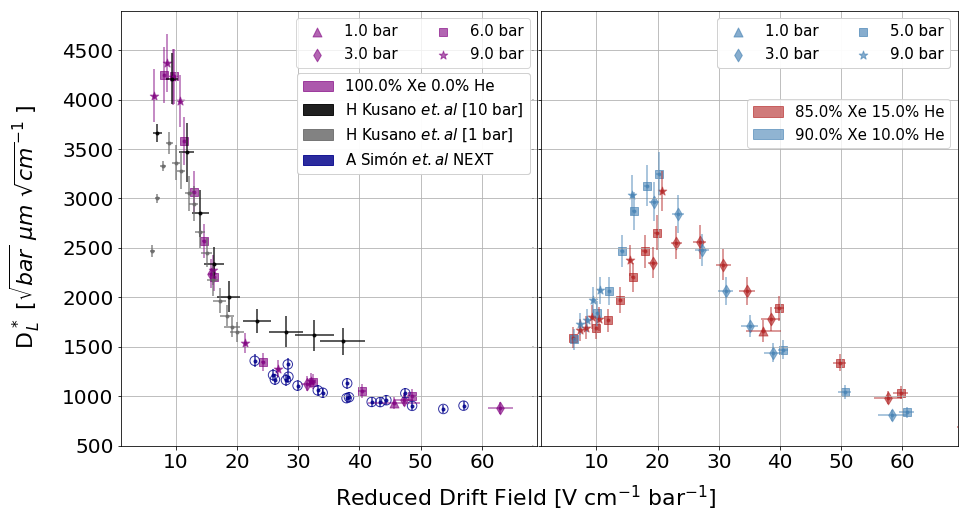

In [348]:
FFF = 13
fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(hspace=0, wspace=0.01)
################################################################################
################################################################################
Pat = []
x=2
ax1 = fig.add_subplot(1, 2,1)
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 14.128
E = vals[:,1]
P = vals[:,2]
dt = vals[:,3]*1e6
#sigma = (vals[:,4]*1e6)**2
sigma1 = (vals[:,4]*1e6)**2
Sigcc = CORRECTION_SIG(dt,P,E,sigma1)
sigma = (vals[:,4]*1e6)**2-Sigcc-(0.01527)**2
V = d/(dt)
cc = CORRECTION(dt,P,E)
V = d/(cc)
R = E*.9767/P
Dslash = sigma*V**3/(2*d)*1e6*P
dell = np.where(Dslash>6000)[0]
Dstar  = np.sqrt(2*Dslash/V)*10
Dslash = np.delete(Dslash,dell)
Dstar = np.delete(Dstar,dell)
sigma = np.delete(sigma,dell)
R = np.delete(R,dell)
E = np.delete(E,dell)
P = np.delete(P,dell)
V = np.delete(V,dell)
dt = np.delete(dt,dell)
B = (.01/(2*sigma))**2+(0.5/dt)**2+(0.1/(2*d))**2+(0.1/(P))**2
B = (.062)**2+(3*4.6e-3)**2+(2*0.01)**2
DeltaD = Dstar*np.sqrt((B))
B = (.1/(E))**2+(0.1/(P))**2
xer = R*np.sqrt((B))
SORT = R.argsort()
lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
color = COL[x]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
Pat.append(pat)
LABB = np.rint(P).astype(str)

plt.errorbar(R, Dstar,xerr=xer,yerr=DeltaD, alpha=0.6,color=color,fmt='.')

#MBX,MBY,Yer,lab = MB_DL(mm,x)
#aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color='steelblue',linestyle=':',label='Magboltz')

for x, y, m, L in zip(R, Dstar, mark,LABB):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 

MBXV,MBYV,Yer,lab = MB_V(mm,2)
DEX = []
for q in range(0,len(xdata)):
    hold = find_nearest(MBXV,xdata[q])
    ll = np.where(MBXV==hold)[0][0]
    DEX.append(ll)
DEX = np.array(DEX)
ydataS = np.sqrt(20*ydata/MBYV[DEX])*10
#plt.errorbar(xdata,ydataS,xerr=xerr,yerr=yerr,fmt='.',color='dimgrey',alpha=0.8)

plt.errorbar(xdata,ydataS,xerr=xerr,yerr=yerr,fmt='.',color='k',alpha=0.85)
lb1 = mpatches.Patch(color='k', label=r'H Kusano $\it{et. al}$ [10 bar]',alpha=0.85)

DEX = []
for q in range(0,len(xdata1)):
    hold = find_nearest(MBXV,xdata1[q])
    ll = np.where(MBXV==hold)[0][0]
    DEX.append(ll)
DEX = np.array(DEX)
ydata1S = np.sqrt(20*ydata1/MBYV[DEX])*10
plt.errorbar(xdata1,ydata1S,xerr=xerr1,yerr=yerr1,fmt='.',color='dimgrey',alpha=0.8)
lb2 = mpatches.Patch(color='dimgrey', label=r'H Kusano $\it{et. al}$ [1 bar]',alpha=0.8)

plt.errorbar(nextX,nextY,yerr=nextY*0.05,fmt='.',color='darkblue',alpha=0.8)
plt.scatter(nextX,nextY, s=90, facecolors='none',color='darkblue',alpha=0.8,linewidths=1)
lb3 = mpatches.Patch(color='darkblue', label=r'A Simón $\it{et. al}$ NEXT',alpha=0.8)

#plt.plot(XX,YY,color='r',label="Magboltz",alpha=0.8)
   
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)

Pat.append(lb1)
Pat.append(lb2)
Pat.append(lb3)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.74),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(1,109)
plt.xlim(1,69)
plt.ylim(501,4900)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

################################################################################
################################################################################
Pat = []
x=2
ax2 = fig.add_subplot(1, 2,2,sharey=ax1)

for x in [0,1]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 14.128
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    #sigma = (vals[:,4]*1e6)**2
    sigma1 = (vals[:,4]*1e6)**2
    Sigcc = CORRECTION_SIG(dt,P,E,sigma1)
    sigma = (vals[:,4]*1e6)**2-Sigcc-(0.01527)**2

    V = d/(dt)
    cc = CORRECTION(dt,P,E)
    V = d/(cc)
    R = E*.9767/P
    Dslash = sigma*V**3/(2*d)*1e6*P
    dell = np.where(Dslash>6000)[0]
    Dstar  = np.sqrt(2*Dslash/V)*10
    Dslash = np.delete(Dslash,dell)
    Dstar = np.delete(Dstar,dell)
    sigma = np.delete(sigma,dell)
    R = np.delete(R,dell)
    E = np.delete(E,dell)
    P = np.delete(P,dell)
    V = np.delete(V,dell)
    dt = np.delete(dt,dell)
    B = (.01/(2*sigma))**2+(0.5/dt)**2+(0.1/(2*d))**2+(0.1/(P))**2
    B = (.062)**2+(3*4.6e-3)**2+(2*0.01)**2
    DeltaD = Dstar*np.sqrt((B))
    B = (.1/(E))**2+(0.1/(P))**2
    xer = R*np.sqrt((B))
    SORT = R.argsort()
    lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)

    plt.errorbar(R, Dstar,xerr=xer,yerr=DeltaD, alpha=0.6,color=color,fmt='.')

    #MBX,MBY,Yer,lab = MB_DL(mm,x)
    #aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color='steelblue',linestyle=':',label='Magboltz')

    for x, y, m, L in zip(R, Dstar, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 


legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.74),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)


plt.gca().add_artist(legend2)


plt.xlim(1,69)
plt.ylim(500,4900)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=0)


fig.text(0.02, 0.5, r" D$^*_L$ [$\sqrt{bar}$ $\mu m$ $\sqrt{cm}^{-1}$ ]",fontsize=22, va='center', rotation='vertical')
fig.text(0.5, 0.02, r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=22, ha='center')


#plt.tight_layout()
#fig.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/XEHE-DIFL-STAR"+".pdf")
plt.show()

In [ ]:
Vz = data[x][:,5]
    P  = data[x][:,3]/760
    E  = data[x][:,4]
    xe = str(data[x][0][0])
    ar = str(data[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Vz
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    SORT = X.argsort()

    X = X[SORT]
    Y = Y[SORT]
    E = E[SORT]
    P = P[SORT]
    dd = np.gradient(Y,X)
    #[1:]/E[1:]**2+1/(P[1:]*E[1:])*np.diff(Vz)

    dmu = -Y/E**2+1/(P*E)*dd
    dmu = X/(Y)*dd
    return X,dmu

In [341]:
###########################################################################################
####################################################
##########################
x=0
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 14.128
E = vals[:,1]
P = vals[:,2]
dt = vals[:,3]*1e6
sigma = (vals[:,4]*1e6)**2
V = d/(dt)
R = E*.9767/P
Dslash = sigma*V**3/(2*d)*1e6*P
#Dstar  = np.sqrt(2*Dslash/V)*10
B = (.062)**2+(3*4.6e-3)**2+(2*0.01)**2
DeltaD = Dslash*np.sqrt((B))

SORT = R.argsort()
Dslash =Dslash[SORT]
dell = np.where(Dslash>6000)[0]
Dslash = np.delete(Dslash,dell)
Dstar = np.delete(Dstar,dell)
sigma = np.delete(sigma[SORT],dell)
R = np.delete(R[SORT],dell)
E = np.delete(E[SORT],dell)
P = np.delete(P[SORT],dell)
V = np.delete(V[SORT],dell)
DeltaD = np.delete(DeltaD[SORT],dell)



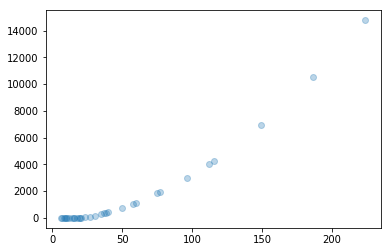

In [342]:
plt.scatter(R,R**2*V,alpha=0.3)


/Users/austinmcdonald/miniconda/envs/IC-3.6-2018-11-14/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


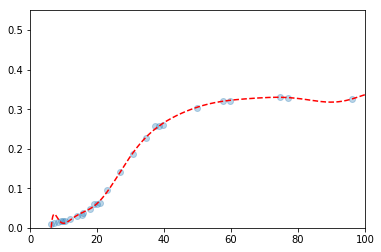

In [343]:
plt.scatter(R,V,alpha=0.3)
xt = np.linspace(6,380,100000)
cof = np.polyfit(R,R**2*V,19)
fit = np.poly1d(cof)
velx = xt
vely = fit(xt)/xt**2

plt.plot(velx,vely,'--r')
plt.xlim(0,100)
plt.ylim(0,.55)
plt.show()

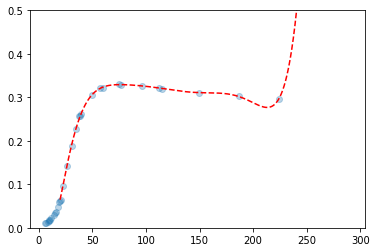

In [344]:
plt.scatter(R,V,alpha=0.3)
xt = np.linspace(20,290,100000)
cof = np.polyfit(R,R**2*V,9)
fit = np.poly1d(cof)
velx = xt
vely = fit(xt)/xt**2

plt.plot(velx,vely,'--r')
#plt.xlim(0,50)
plt.ylim(0,0.5)
plt.show()

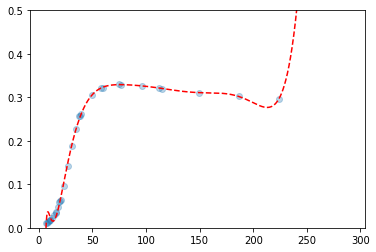

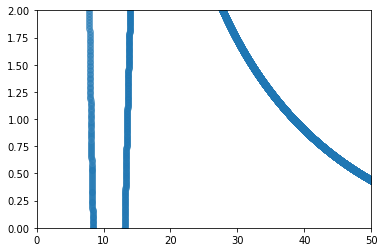

/Users/austinmcdonald/miniconda/envs/IC-3.6-2018-11-14/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in sqrt


(0, 50)

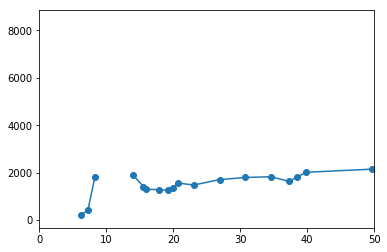

In [345]:
##################################################
#velocity fit
plt.scatter(R,V,alpha=0.3)
xt = np.linspace(6,290,100000)
cof = np.polyfit(R,R**2*V,9)
fit = np.poly1d(cof)
velx = xt
vely = fit(xt)/xt**2

plt.plot(velx,vely,'--r')
#plt.xlim(0,50)
plt.ylim(0,0.5)
plt.show()
##################################################
#finding the D mu
#Dmu = (velx/(vely))*np.gradient(vely,velx)
Dmu = (velx/(vely))[1:]*(vely[1:]-vely[:-1])/(velx[1]-velx[0])
plt.scatter(velx[1:],Dmu,alpha=0.3)
plt.ylim(0,2)
plt.xlim(0,50)

plt.show()
##################################################
## finding the velx index that matches R
DEX = []
for q in range(0,len(R)):
    hold = find_nearest(velx,R[q])
    ll = np.where(velx==hold)[0][0]
    DEX.append(ll)
DEX = np.array(DEX)
DEX

##################################################
## 
DL = (sigma*V**3*1e6)/(2*d)
DT = DL/Dmu[DEX]
DDD = np.sqrt(2*(DT)/(vely[DEX]))*10

#plt.scatter(R,DL*P)
#plt.scatter(R,DT*P)
plt.plot(R,DDD*np.sqrt(P))
plt.scatter(R,DDD*np.sqrt(P))

plt.xlim(0,50)
#plt.scatter(R,Dslash)

In [346]:
R

array([  6.22101911,   7.25785563,   8.29469214,   9.33152866,
         9.94602851,  10.36836518,  11.93523422,  13.92443992,
        15.55254777,  15.91364562,  17.90285132,  19.22637795,
        19.89205703,  20.73673036,  23.07165354,  26.91692913,
        30.76220472,  34.60748031,  37.27862595,  38.45275591,
        39.78411405,  49.73014257,  57.67913386,  59.67617108,
        74.55725191,  76.90551181,  96.13188976, 111.83587786,
       115.35826772, 149.11450382, 186.39312977, 223.67175573])

In [347]:
DDD*np.sqrt(P)

array([ 210.3374719 ,  420.64783962, 1811.00466182,           nan,
                 nan,           nan,           nan, 1917.15067605,
       1413.23764479, 1292.84247128, 1282.27392037, 1247.37552557,
       1369.1716517 , 1557.36494885, 1475.59493737, 1704.5346605 ,
       1795.46152772, 1823.84680543, 1630.84513474, 1800.20148044,
       2013.44076455, 2146.70713932, 2202.46934849, 2774.22077684,
       8308.57611342,           nan,           nan,           nan,
                 nan,           nan,           nan,  254.20914963])

In [320]:
xe85R  = np.array([  6.22101911,   7.25785563,   8.29469214,   9.33152866,
         9.94602851,  10.36836518,  11.93523422,  13.92443992,
        15.55254777,  15.91364562,  17.90285132,  19.22637795,
        19.89205703,  20.73673036,  23.07165354,  26.91692913,
        30.76220472,  34.60748031,  37.27862595,  38.45275591,
        39.78411405,  49.73014257,  57.67913386,  59.67617108,
        74.55725191,  76.90551181,  96.13188976, 111.83587786,
       115.35826772, 149.11450382, 186.39312977, 223.67175573])

xe85mu = np.array([ 210.3374719 ,  420.64783962, 1811.00466182,           np.nan,
                 np.nan,           np.nan,           np.nan, 1917.15067605,
       1413.23764479, 1292.84247128, 1282.27392037, 1247.37552557,
       1369.1716517 , 1557.36494885, 1475.59493737, 1704.5346605 ,
       1795.46152772, 1823.84680543, 1630.84513474, 1800.20148044,
       2013.44076455, 2146.70713932, 2202.46934849, 2774.22077684,
       8308.57611342,           np.nan,           np.nan,           np.nan,
                 np.nan,           np.nan,           np.nan,  254.20914963])

xe90R = np.array([  6.32850972,   7.38326134,   8.43801296,   9.49276458,
        10.11076605,  10.5475162 ,  12.13291925,  14.15507246,
        15.8212743 ,  16.17722567,  18.19937888,  19.4561753 ,
        20.22153209,  23.34741036,  27.23864542,  31.12988048,
        35.02111554,  38.9123506 ,  40.44306418,  50.55383023,
        58.3685259 ,  60.66459627,  77.51587302,  77.8247012 ,
        97.28087649, 116.27380952, 116.73705179, 155.03174603,
       193.78968254, 232.54761905])
xe90mu = np.array([          np.nan,           np.nan,           np.nan,           np.nan,
                np.nan,           np.nan, 1003.77518355, 1031.92073332,
       1255.44994904, 1248.3071351 , 1509.14302464, 1617.43183227,
       1781.25332224, 1959.15620001, 2080.96420191, 2056.21544377,
       2007.68553887, 2004.58181648, 2246.67740829, 3189.8613933 ,
                 np.nan,           np.nan,           np.nan,           np.nan,
                 np.nan,           np.nan,           np.nan,           np.nan,
                 np.nan,  230.42091357])

In [321]:
B = (.062)**2+(3*4.6e-3)**2+(2*0.01)**2
DeltaD = np.sqrt((B))

In [322]:
Next9=np.loadtxt("/Users/austinmcdonald/Desktop/NEXT_Trans_9.csv",delimiter=',')
Next7=np.loadtxt("/Users/austinmcdonald/Desktop/NEXT_Trans_7.csv",delimiter=',')

In [323]:
ExtrapErr85=0.046264710792741436
ExtrapErr90=0.12370092141967926


In [324]:
COL

['firebrick', 'steelblue', 'purple', 'darkblue']

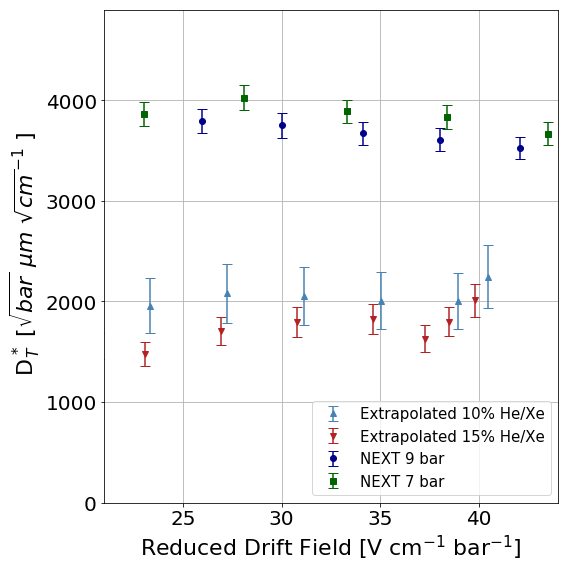

In [328]:
fig = plt.figure(figsize=(8,8))
#plt.plot(xe90R,xe90mu,'s',label='Extrapolated 10% He/Xe',color='k')
yer = (xe90mu*np.sqrt(DeltaD**2+ExtrapErr90**2))
#yer[np.isnan(yer)] = 0
plt.errorbar(xe90R,xe90mu,yerr=yer,label='Extrapolated 10% He/Xe',fmt='^',color=COL[1],capsize=5)

yer = (xe85mu*np.sqrt(DeltaD**2+ExtrapErr85**2))
plt.errorbar(xe85R,xe85mu,yerr=yer,label='Extrapolated 15% He/Xe',fmt='v',color=COL[0],capsize=5)


plt.errorbar(Next9[:,0],Next9[:,1],yerr=Next9[:,2],label="NEXT 9 bar",fmt='o',color='DarkBlue',capsize=5)
plt.errorbar(Next7[:,0],Next7[:,1],yerr=Next7[:,2],label="NEXT 7 bar",fmt='s',color='DarkGreen',capsize=5)
plt.legend(loc='lower right',fontsize=15)
plt.xlim(21,44)
plt.ylim(0,4900)

plt.xlabel( r'Reduced Drift Field [V cm$^{-1}$ bar$^{-1}$]',fontsize=22)
plt.ylabel(r" D$^*_T$ [$\sqrt{bar}$ $\mu m$ $\sqrt{cm}^{-1}$ ]",fontsize=22)

plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/Trans-extrap"+".pdf",bbox_inches='tight')
plt.show()

In [ ]:
FFF = 13
fig = plt.figure(figsize=(8,8))
#fig.subplots_adjust(hspace=0, wspace=0)
################################################################################
################################################################################
Pat = []
x=0
ax1 = plt.gca()#fig.add_subplot(1, 2,1)
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 14.128
E = vals[:,1]
P = vals[:,2]
dt = vals[:,3]*1e6
sigma = (vals[:,4]*1e6)**2
V = d/(dt)
cc = CORRECTION(dt,P,E)
V = d/(cc)
R = E*.9767/P
Dslash = sigma*V**3/(2*d)*1e6*P
#Dstar  = np.sqrt(2*Dslash/V)*10
B = (.01/(2*sigma))**2+(0.5/dt)**2+(0.1/(2*d))**2+(0.1/(P))**2
B = (.062)**2+(3*4.6e-3)**2+(2*0.01)**2
DeltaD = Dslash*np.sqrt((B))
B = (.1/(E))**2+(0.1/(P))**2
xer = R*np.sqrt((B))
SORT = R.argsort()
lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
color = COL[x]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
Pat.append(pat)
LABB = np.rint(P).astype(str)

plt.errorbar(R, Dslash,xerr=xer,yerr=DeltaD, alpha=0.6,color=color,fmt='.')

MBX,MBY,Yer,lab = MB_DL(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color=COL[x],linestyle='--',label='Magboltz')

for x, y, m, L in zip(R, Dslash, mark,LABB):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)

Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.74),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(1,299)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

################################################################################


plt.ylim(0,7400)
plt.xlabel( r'Reduced Drift Field [V cm$^{-1}$ Bar$^{-1}$]',fontsize=22)
plt.ylabel(r" D$_L$P [bar cm$^2$ $\mu$s$^{-1}$ ]",fontsize=22)

plt.tight_layout()
#fig.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/085XE15HE-DIFL"+".pdf")
plt.show()

In [274]:
yer = xe90mu*np.sqrt(xe90er**2+ExtrapErr90**2)
yer

array([            nan,             nan,             nan,             nan,
                   nan,             nan,  35017.6339452 ,  69509.218552  ,
       155296.19965359, 157470.38605822, 312914.99960976, 399839.9855034 ,
       541212.93137205, 720610.43515979, 794445.52522586, 659287.23078746,
       498340.29847529, 380120.85820807, 473475.32100911, 398617.50196923,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,   3943.13006864])

(0, 5000)

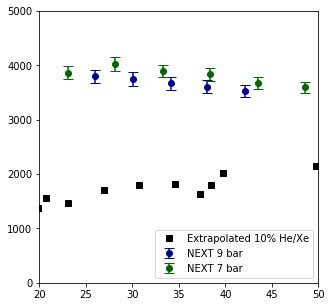

In [275]:
plt.figure(figsize=(5,5))
plt.plot(R,DDD*np.sqrt(P),'s',label='Extrapolated 10% He/Xe',color='k')
plt.errorbar(Next9[:,0],Next9[:,1],yerr=Next9[:,2],label="NEXT 9 bar",fmt='o',color='DarkBlue',capsize=5)
plt.errorbar(Next7[:,0],Next7[:,1],yerr=Next7[:,2],label="NEXT 7 bar",fmt='o',color='DarkGreen',capsize=5)
plt.legend(loc='lower right')
plt.xlim(20,50)
plt.ylim(0,5000)

In [ ]:
# works
##################################################
#velocity fit
plt.scatter(R,V,alpha=0.3)
xt = np.linspace(7,290,100000)
cof = np.polyfit(R,R*V,2)
fit = np.poly1d(cof)
velx = xt
vely = fit(xt)/xt

plt.plot(velx,vely,'--r')
plt.xlim(0,50)
plt.ylim(0,.15)
plt.show()
##################################################
#finding the D mu
#Dmu = (velx/(vely))*np.gradient(vely,velx)
Dmu = (velx/(vely))[1:]*(vely[1:]-vely[:-1])/(velx[1]-velx[0])
plt.scatter(velx[1:],Dmu,alpha=0.3)
plt.ylim(0,2)
plt.xlim(0,50)

plt.show()
##################################################
## finding the velx index that matches R
DEX = []
for q in range(0,len(R)):
    hold = find_nearest(velx,R[q])
    ll = np.where(velx==hold)[0][0]
    DEX.append(ll)
DEX = np.array(DEX)
DEX

##################################################
## 
DL = (sigma*V**3*1e6)/(2*d)
DT = DL/Dmu[DEX]
DDD = np.sqrt(2*(DT)/(vely[DEX]))*10

#plt.scatter(R,DL*P)
#plt.scatter(R,DT*P)
plt.plot(R,DDD*np.sqrt(P))
plt.xlim(0,50)
#plt.scatter(R,Dslash)

In [163]:
DL

array([  13.79360957,   17.90938003,   21.27026962,   27.58062157,
         52.91147893,   30.62861331,   73.38846358,  115.02447156,
         99.68182905,  182.88886671,  292.47311375,  649.36897861,
        436.13260306,  317.9688668 , 1224.89913805, 1802.72140974,
       1983.50992201, 1893.48626806, 2695.43478823, 1619.96561795,
        991.81925695,  641.57732175,  683.30814893,  460.67090901,
        677.23947208,  409.51366326,  300.56332973,  392.04245454,
        249.60778188,  298.58723033,  244.93971998,  229.20495894])

In [168]:
len(Dmu)

999

In [175]:
DEX

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        12,  51, 115, 179, 243, 288, 307, 329, 495, 627, 661, 908, 947,
       999, 999, 999, 999, 999, 999])

(0, 1)

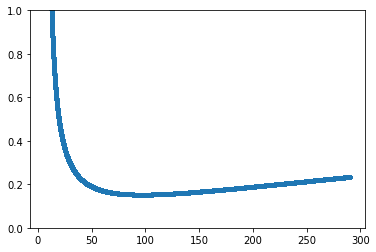

In [1038]:
plt.plot(velx[1:],Dmu,'.')
plt.ylim(0,1)

In [1024]:
R

array([  6.41159737,   8.0852649 ,   8.5487965 ,   9.61739606,
         9.70231788,  10.68599562,  11.31937086,  12.93642384,
        14.55347682,  15.75322581,  16.02899344,  16.1705298 ,
        21.37199125,  24.2557947 ,  26.71498906,  31.50645161,
        32.05798687,  32.3410596 ,  40.4263245 ,  45.64018692,
        47.25967742,  48.5115894 ,  63.01290323,  78.76612903,
        91.28037383,  94.51935484, 136.92056075, 182.56074766,
       228.20093458, 273.8411215 ])

In [1026]:
velx[DEX]

array([  7.        ,   8.08620086,   8.54908549,   9.61687617,
         9.70103701,  10.68729687,  11.31850319,  12.93596936,
        14.55343553,  15.75272753,  16.02888029,  16.17090171,
        21.37309373,  24.25560256,  26.71467715,  31.50658507,
        32.05889059,  32.3403034 ,  40.42763428,  45.6403464 ,
        47.2604426 ,  48.51233512,  63.01167012,  78.76552766,
        91.27919279,  94.51938519, 136.92066921, 182.5595156 ,
       228.20099201, 270.        ])

In [1027]:
vely[DEX]

array([0.00959421, 0.02250515, 0.02701833, 0.0357888 , 0.03639895,
       0.04284261, 0.04638597, 0.05391472, 0.05980485, 0.06341204,
       0.06416865, 0.06454805, 0.07509676, 0.0790867 , 0.08185761,
       0.08612145, 0.0865399 , 0.08674831, 0.0916603 , 0.09405102,
       0.09470933, 0.0951951 , 0.09976632, 0.10341212, 0.10578702,
       0.10635183, 0.11264977, 0.11829369, 0.12345054, 0.12795642])

In [962]:
DEX = []
for q in range(0,len(R)):
    hold = find_nearest(velx,R[q])
    ll = np.where(velx==hold)[0][0]
    DEX.append(ll)
DEX = np.array(DEX)
DEX

array([    0,   413,   589,   995,  1027,  1402,  1642,  2257,  2872,
        3328,  3433,  3487,  5465,  6561,  7496,  9318,  9528,  9635,
       12710, 14692, 15308, 15784, 21297, 27287, 32045, 33277, 49399,
       66752, 84106, 99999])

In [963]:
velx[DEX]

array([  7.        ,   8.08620086,   8.54908549,   9.61687617,
         9.70103701,  10.68729687,  11.31850319,  12.93596936,
        14.55343553,  15.75272753,  16.02888029,  16.17090171,
        21.37309373,  24.25560256,  26.71467715,  31.50658507,
        32.05889059,  32.3403034 ,  40.42763428,  45.6403464 ,
        47.2604426 ,  48.51233512,  63.01167012,  78.76552766,
        91.27919279,  94.51938519, 136.92066921, 182.5595156 ,
       228.20099201, 270.        ])

In [964]:
R

array([  6.41159737,   8.0852649 ,   8.5487965 ,   9.61739606,
         9.70231788,  10.68599562,  11.31937086,  12.93642384,
        14.55347682,  15.75322581,  16.02899344,  16.1705298 ,
        21.37199125,  24.2557947 ,  26.71498906,  31.50645161,
        32.05798687,  32.3410596 ,  40.4263245 ,  45.64018692,
        47.25967742,  48.5115894 ,  63.01290323,  78.76612903,
        91.28037383,  94.51935484, 136.92056075, 182.56074766,
       228.20093458, 273.8411215 ])

In [955]:
xt

array([  7.        ,   7.02630263,   7.05260526, ..., 269.94739474,
       269.97369737, 270.        ])

In [692]:
import scipy.signal
from scipy.interpolate import interp1d

In [638]:
len(xxtv)

5000

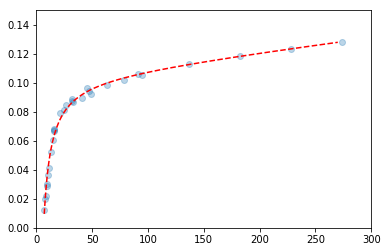

In [906]:
plt.scatter(R,V,alpha=0.3)
xt = np.linspace(7,270,1000)
cof = np.polyfit(R,R*V,2)
fit = np.poly1d(cof)

xxtv = xt
yytv = fit(xt)/xt

plt.plot(xt,fit(xt)/xt,'--r')
plt.xlim(0,300)
plt.ylim(0,.15)
plt.show()

(0, 0.002)

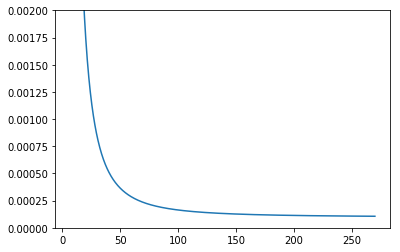

In [907]:
plt.plot(xxtv,np.gradient(yytv,xxtv))
plt.ylim(0,0.002)

(0, 2)

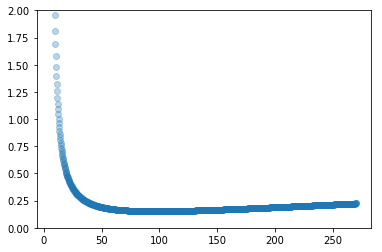

In [908]:
Dmu = (xxtv/yytv)*np.gradient(yytv,xxtv)
xt = np.linspace(7,270,1000)

plt.scatter(xxtv,Dmu,alpha=0.3)
#yt = interp1d(xxtv, Dmu, kind='linear')
#DDmu = yt(xxtv)
#plt.plot(xxtv,DDmu)
#DM = yt(xt)


#xxtDmu = scipy.signal.savgol_filter(xxtv, 31, 1)
#yytDmu = scipy.signal.savgol_filter(Dmu,  31, 1)
#plt.plot(xxtDmu,yytDmu='g)
plt.ylim(0,2)

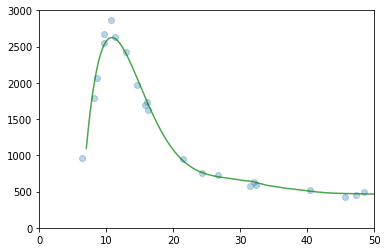

In [933]:

#yt = np.interp(xt, R, Dslash)
#plt.plot(xt,yt)
plt.scatter(R,Dslash,alpha=0.3)
xt = np.linspace(7,270,1000)
yt = interp1d(R, Dslash, kind='linear')

#plt.plot(xt,yt(xt),color='r')

xxt = scipy.signal.savgol_filter(xt    , 181, 7)
yyt = scipy.signal.savgol_filter(yt(xt), 181, 7)
plt.plot(xxt,yyt,color='g',alpha=0.7)

plt.ylim(0,3000)
plt.xlim(0,300)
plt.xlim(0,50)
plt.show()

In [936]:
DEX = []
for q in range(0,len(R)):
    hold = find_nearest(xt,R[q])
    ll = np.where(xt==hold)[0][0]
    DEX.append(ll)
DEX = np.array(DEX)
#DeltaD = Dslash/CONVERT[DEX]*np.sqrt((B))
#plt.errorbar(R, Dslash/CONVERT[DEX],yerr=DeltaD+Dslash*0.1, alpha=0.6,color=color,fmt='.')

/Users/austinmcdonald/miniconda/envs/IC-3.6-2018-11-14/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


(0, 300)

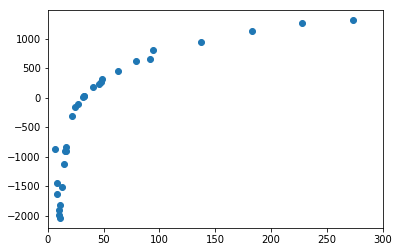

In [944]:
yyt2 = np.sqrt(2*yyt/yytv)*10
#yytDmu
#plt.plot(xxt,yt(xt)/Dmu)
DDD = np.sqrt(2*(Dslash/Dmu[DEX])/yytv[DEX])
DDD = Dslash/Dmu[DEX]
plt.scatter(R,DDD)


#plt.ylim(0,6000)
plt.xlim(0,300)


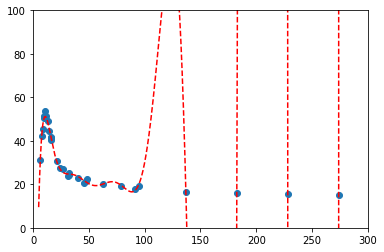

In [568]:
#yt = np.interp(xt, R, Dslash)
#plt.plot(xt,yt)
plt.scatter(R,Dslash)
xt = np.linspace(5,300,5000)

cof = np.polyfit(R,Dslash**0.5,11)
fit2 = np.poly1d(cof)
plt.plot(xt,fit2(xt),'--r')
plt.ylim(0,100)
plt.xlim(0,300)
plt.show()

In [510]:
np.where(Dslash>6000)[0]

array([0])

In [481]:
qq = np.array([0,1,2,3,4])
moving_average(qq,3)

array([1., 2., 3.])

In [480]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [408]:
V

array([0.08871548, 0.11937506, 0.19909453, 0.21828773, 0.28719468,
       0.30009692, 0.36426948, 0.41485967, 0.52147565, 0.60717921,
       0.68248382, 0.67250149, 0.6707592 , 0.79287847, 0.81380667,
       0.84443258, 0.88672795, 0.87529213, 0.86531006, 0.89821634,
       0.96743113, 0.94442194, 0.92456306, 0.98604772, 1.02112401,
       1.06082569, 1.05282567, 1.13018987, 1.18725138, 1.23674627,
       1.28136371])

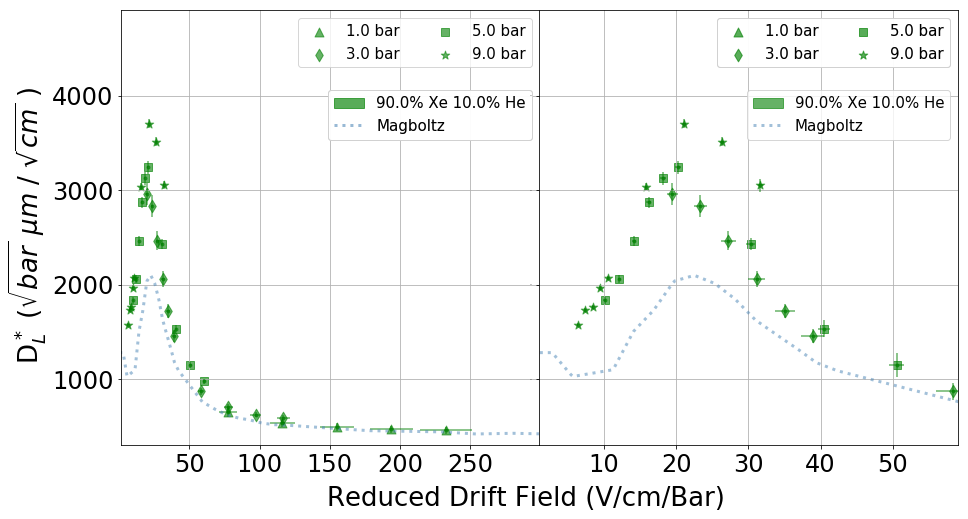

In [284]:
FFF = 13

fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(hspace=0, wspace=0)
################################################################################
################################################################################
Pat = []
x=1
ax1 = fig.add_subplot(1, 2,1)
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 14.128
E = vals[:,1]
P = vals[:,2]
dt = vals[:,3]*1e6
sigma = (vals[:,4]*1e6)**2
V = d/(dt)
R = E*.9767/P
Dslash = sigma*V**3/(2*d)*1e6*P
Dstar  = np.sqrt(2*Dslash/V)*10
B = (.01/(2*sigma))**2+(0.5/dt)**2+(0.1/(2*d))**2+(0.1/(P))**2
DeltaD = Dstar*np.sqrt((B))
B = (.1/(E))**2+(0.1/(P))**2
xer = R*np.sqrt((B))
SORT = R.argsort()
lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
color = COL[x]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
Pat.append(pat)
LABB = np.rint(P).astype(str)

plt.errorbar(R, Dstar,xerr=xer,yerr=DeltaD, alpha=0.6,color=color,fmt='.')

MBX,MBY,Yer,lab = MB_DLtpc(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color='steelblue',linestyle=':',label='Magboltz')

for x, y, m, L in zip(R, Dstar, mark,LABB):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 

#MBXV,MBYV,Yer,lab = MB_V(mm,2)
#DEX = []
#for q in range(0,len(xdata)):
#    hold = find_nearest(MBXV,xdata[q])
#    ll = np.where(MBXV==hold)[0][0]
#    DEX.append(ll)
#DEX = np.array(DEX)

#ydataS = np.sqrt(20*ydata/MBYV[DEX])*10
#plt.errorbar(xdata,ydataS,xerr=xerr,yerr=yerr,fmt='.',color='dimgrey',alpha=0.8)
#lb1 = mpatches.Patch(color='dimgrey', label=r'H Kusano $\it{et. al}$ [10 bar]',alpha=0.8)
#plt.plot(XX,YY,color='r',label="Magboltz",alpha=0.8)
   
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)

#Pat.append(lb1)
Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.76),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(1,299)
plt.ylim(501,4900)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

################################################################################
################################################################################
Pat = []
x=1
ax2 = fig.add_subplot(1, 2,2,sharey=ax1)
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 14.128
E = vals[:,1]
P = vals[:,2]
dt = vals[:,3]*1e6
sigma = (vals[:,4]*1e6)**2
V = d/(dt)
R = E*.9767/P
Dslash = sigma*V**3/(2*d)*1e6*P
Dstar  = np.sqrt(2*Dslash/V)*10

B = (.1/(2*sigma))**2+(0.5/dt)**2+(0.1/(2*d))**2+(0.1/(P))**2
DeltaD = Dstar*np.sqrt((B))
B = (.1/(E))**2+(0.1/(P))**2
xer = R*np.sqrt((B))
SORT = R.argsort()
lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
color = COL[x]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
Pat.append(pat)
LABB = np.rint(P).astype(str)

plt.errorbar(R, Dstar,xerr=xer,yerr=DeltaD, alpha=0.6,color=color,fmt='.')

MBX,MBY,Yer,lab = MB_DLtpc(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color='steelblue',linestyle=':',label='Magboltz')
#lb2 = mpatches.Patch(color='r', label='Magboltz',alpha=0.5)

for x, y, m, L in zip(R, Dstar, mark,LABB):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 

#MBXV,MBYV,Yer,lab = MB_V(mm,2)
#DEX = []
#for q in range(0,len(xdata)):
#    hold = find_nearest(MBXV,xdata[q])
#    ll = np.where(MBXV==hold)[0][0]
#    DEX.append(ll)
#DEX = np.array(DEX)

#ydataS = np.sqrt(20*ydata/MBYV[DEX])*10
#plt.errorbar(xdata,ydataS,xerr=xerr,yerr=yerr,fmt='.',color='dimgrey',alpha=0.8)
#lb1 = mpatches.Patch(color='dimgrey', label=r'H Kusano $\it{et. al}$ [10 bar]',alpha=0.8)

#Pat.append(lb1)
Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.76),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)


plt.gca().add_artist(legend2)


plt.xlim(1,59)
plt.ylim(300,4900)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=0)


fig.text(0.5, 0.02, r'Reduced Drift Field (V/cm/Bar)',fontsize=26, ha='center')
fig.text(0.02, 0.5, r" D$^*_L$ ($\sqrt{bar}$ $\mu m$ / $\sqrt{cm}$ )",fontsize=26, va='center', rotation='vertical')


#plt.tight_layout()
#fig.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/090XE10HE-DIFL"+".pdf")
plt.show()

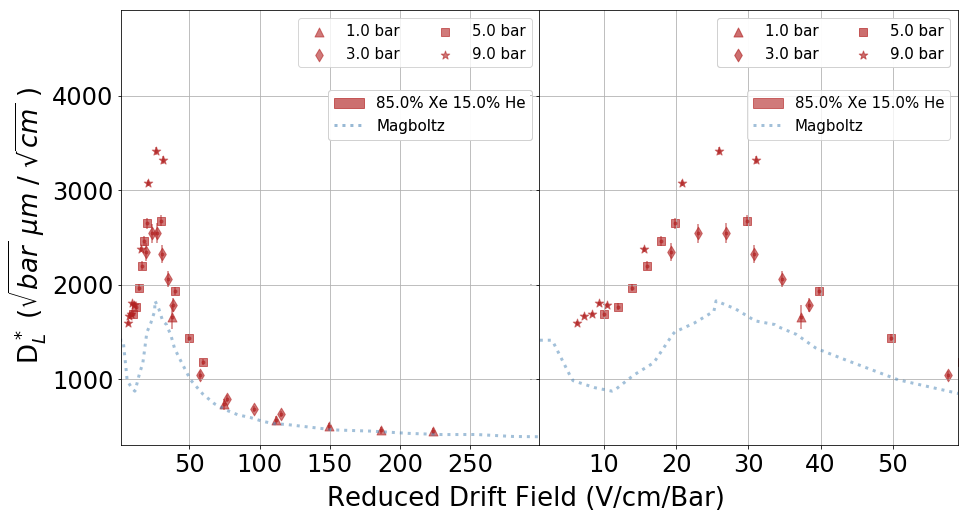

In [339]:
FFF = 13

fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(hspace=0, wspace=0)
################################################################################
################################################################################
Pat = []
x=0
ax1 = fig.add_subplot(1, 2,1)
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 14.128
E = vals[:,1]
P = vals[:,2]
dt = vals[:,3]*1e6
sigma = (vals[:,4]*1e6)**2
V = d/(dt)
R = E*.9767/P
Dslash = sigma*V**3/(2*d)*1e6*P
Dstar  = np.sqrt(2*Dslash/V)*10
B = (.01/(2*sigma))**2+(0.5/dt)**2+(0.1/(2*d))**2+(0.1/(P))**2
DeltaD = Dstar*np.sqrt((B))

SORT = R.argsort()
lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
color = COL[x]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
Pat.append(pat)
LABB = np.rint(P).astype(str)

plt.errorbar(R, Dstar,yerr=DeltaD, alpha=0.6,color=color,fmt='.')

MBX,MBY,Yer,lab = MB_DLtpc(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color='steelblue',linestyle=':',label='Magboltz')

for x, y, m, L in zip(R, Dstar, mark,LABB):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 

#MBXV,MBYV,Yer,lab = MB_V(mm,2)
#DEX = []
#for q in range(0,len(xdata)):
#    hold = find_nearest(MBXV,xdata[q])
#    ll = np.where(MBXV==hold)[0][0]
#    DEX.append(ll)
#DEX = np.array(DEX)

#ydataS = np.sqrt(20*ydata/MBYV[DEX])*10
#plt.errorbar(xdata,ydataS,xerr=xerr,yerr=yerr,fmt='.',color='dimgrey',alpha=0.8)
#lb1 = mpatches.Patch(color='dimgrey', label=r'H Kusano $\it{et. al}$ [10 bar]',alpha=0.8)
#plt.plot(XX,YY,color='r',label="Magboltz",alpha=0.8)
   
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)

#Pat.append(lb1)
Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.76),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(1,299)
plt.ylim(501,4900)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

################################################################################
################################################################################
Pat = []
x=0
ax2 = fig.add_subplot(1, 2,2,sharey=ax1)
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 14.128
E = vals[:,1]
P = vals[:,2]
dt = vals[:,3]*1e6
sigma = (vals[:,4]*1e6)**2
V = d/(dt)
R = E*.9767/P
Dslash = sigma*V**3/(2*d)*1e6*P
Dstar  = np.sqrt(2*Dslash/V)*10

B = (.01/(2*sigma))**2+(0.5/dt)**2+(0.1/(2*d))**2+(0.1/(P))**2
DeltaD = Dstar*np.sqrt((B))
SORT = R.argsort()
lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
color = COL[x]
pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
Pat.append(pat)
LABB = np.rint(P).astype(str)

plt.errorbar(R, Dstar,yerr=DeltaD, alpha=0.6,color=color,fmt='.')

MBX,MBY,Yer,lab = MB_DLtpc(mm,x)
aa, = plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color='steelblue',linestyle=':',label='Magboltz')
#lb2 = mpatches.Patch(color='r', label='Magboltz',alpha=0.5)

for x, y, m, L in zip(R, Dstar, mark,LABB):
    plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 

#MBXV,MBYV,Yer,lab = MB_V(mm,2)
#DEX = []
#for q in range(0,len(xdata)):
#    hold = find_nearest(MBXV,xdata[q])
#    ll = np.where(MBXV==hold)[0][0]
#    DEX.append(ll)
#DEX = np.array(DEX)

#ydataS = np.sqrt(20*ydata/MBYV[DEX])*10
#plt.errorbar(xdata,ydataS,xerr=xerr,yerr=yerr,fmt='.',color='dimgrey',alpha=0.8)
#lb1 = mpatches.Patch(color='dimgrey', label=r'H Kusano $\it{et. al}$ [10 bar]',alpha=0.8)

#Pat.append(lb1)
Pat.append(aa)
legend1=plt.legend(handles=Pat,loc='center right',bbox_to_anchor=(1, 0.76),ncol=1,fontsize=15)
plt.gca().add_artist(legend1)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels[1:], handles[1:]))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2,fontsize=15)


plt.gca().add_artist(legend2)


plt.xlim(1,59)
plt.ylim(300,4900)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=0)

fig.text(0.5, 0.02, r'Reduced Drift Field (V/cm/Bar)',fontsize=26, ha='center')
fig.text(0.02, 0.5, r" D$^*_L$ ($\sqrt{bar}$ $\mu m$ / $\sqrt{cm}$ )",fontsize=26, va='center', rotation='vertical')


#plt.tight_layout()
#fig.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_MIX_PLOTS/085XE15HE-DIFL"+".pdf")
plt.show()

In [ ]:
data=mm
x=0
Vz = data[x][:,5]
P  = data[x][:,3]/760
E  = data[x][:,4]
xe = str(data[x][0][0])
ar = str(data[x][0][1])
lab = xe+'%Xe '+ar+'%He'
X = E/P
Y = Vz
SORT = X.argsort()
X = X[SORT]
Y = Y[SORT]
E = E[SORT]
P = P[SORT]
dd = np.gradient(Y,X)
dmu = X/(Y)*dd

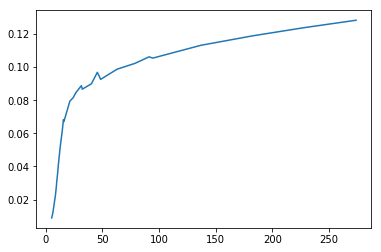

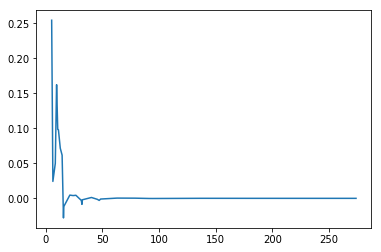

In [309]:
x=2
Pc = Percents[x]
DATA = Data[Data[:,0].astype(float)==Pc]
vals = DATA[:,:-1].astype(float)
mark = DATA[:,-1]
d = 14.128
E = vals[:,1]
P = vals[:,2]
dt = vals[:,3]*1e6
sigma = (vals[:,4]*1e6)**2
V = d/(dt)
R = E*.9767/P
Dslash = sigma*V**3/(2*d)*1e6*P
Dstar  = np.sqrt(2*Dslash/V)*10
SORT = R.argsort()
plt.plot(R[SORT],V[SORT])
plt.show()
R = R[SORT]
E = E[SORT]
P = P[SORT]
V = V[SORT]
Dstar = Dstar[SORT]
Dmu = R/V*np.gradient(R,V)
plt.plot(R,Dstar/Dmu)

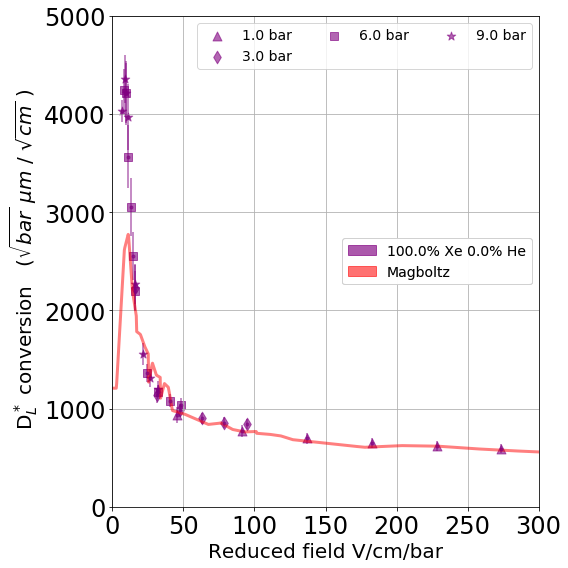

In [299]:
Pat = []
plt.figure(figsize=(8,8))
#for x in range(0,len(Percents)):
for x in [2]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 14.128
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    sigma = (vals[:,4]*1e6)**2
    V = d/(dt)
    R = E*.9767/P
    Dslash = sigma*V**3/(2*d)*1e6*P
    Dstar  = np.sqrt(2*Dslash/V)*10
    
    B = (.01/(sigma))**2+9*(0.5/dt)**2+4*(0.1/(d))**2+(0.1/(P))**2
    
    DeltaD = Dslash*np.sqrt((B))
    
    SORT = R.argsort()
    lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    #plt.plot(R[SORT], Dslash[SORT], alpha=0.6,color=color)
    plt.errorbar(R, Dstar,yerr=DeltaD+Dslash*0.1, alpha=0.6,color=color,fmt='.')
    
    MBX,MBY,Yer,lab = MB_DLtpc(mm,x)
    plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color='r')
    lb2 = mpatches.Patch(color='r', label='Magboltz',alpha=0.5)

    for x, y, m, L in zip(R, Dstar, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=3,fontsize=14)

Pat.append(lb2)
legend1=plt.legend(handles=Pat,loc='center right',ncol=1,fontsize=14)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(0,300)#
#plt.xlim(0,100)
plt.ylim(0,5000)#
#plt.legend(loc='upper right',fontsize=14,ncol=3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel("Reduced field V/cm/bar",fontsize=20)
plt.ylabel(r" D$^*_L$ conversion   ($\sqrt{bar}$ $\mu m$ / $\sqrt{cm}$ )",fontsize=20)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/100XE00HE-diff-zoom"+".pdf")
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/100XE00HE-diff"+".pdf")
#plt.axvline(13)
plt.show()

In [103]:
DEX

array([ 233,  311,  392,  467,  542,  621,  777,  934, 1087, 1242])

In [89]:
Pat = []
plt.figure(figsize=(15,8))
#for x in range(0,len(Percents)):
for x in [2]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 14.128
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    sigma = (vals[:,4]*1e6)**2
    
    V = d/(dt)
    R = E*.9767/P
    Dslash = sigma*V**3/(2*d)*1e6*P
    
    B = (.01/(sigma))**2+9*(0.5/dt)**2+4*(0.1/(d))**2+(0.1/(P))**2
    
    DeltaD = Dslash*np.sqrt((B))
    
    SORT = R.argsort()
    lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    #plt.plot(R[SORT], Dslash[SORT], alpha=0.6,color=color)
    #plt.errorbar(R, Dslash,yerr=DeltaD+Dslash*0.1, alpha=0.6,color=color,fmt='.')
    
    MBDX,MBDY,Yer,lab = MB_D(mm,x)
    MBTX,MBTY,Yer,lab = MB_DT(mm,x)
    CONVERT =MBDY/MBTY 
    DEX = []
    for q in range(0,len(R)):
        hold = find_nearest(MBDX,R[q])
        ll = np.where(MBDX==hold)[0][0]
        DEX.append(ll)
    DEX = np.array(DEX)
    DeltaD = Dslash/CONVERT[DEX]*np.sqrt((B))
    plt.errorbar(R, Dslash/CONVERT[DEX],yerr=DeltaD+Dslash*0.1, alpha=0.6,color=color,fmt='.')
    plt.plot(MBTX,MBTY,linewidth=3,alpha=0.5,color='r')
    lb2 = mpatches.Patch(color='r', label='Magboltz',alpha=0.5)

    for x, y, m, L in zip(R, Dslash/CONVERT[DEX], mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 

        
#plt.errorbar(xdata,ydata,xerr=xerr,yerr=yerr,fmt='.',color='gold',alpha=0.8)
#lb1 = mpatches.Patch(color='gold', label='H Kusano et al',alpha=0.8)
#plt.plot(XX,YY,color='r',label="Magboltz",alpha=0.8)
   
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=3,fontsize=20)

#Pat.append(lb1)
Pat.append(lb2)
legend1=plt.legend(handles=Pat,loc='center right',ncol=1,fontsize=20)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(0,300)#
plt.xlim(0,100)
plt.ylim(0,8000)#
#plt.legend(loc='upper right',fontsize=14,ncol=3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel("Reduced field V/cm/bar",fontsize=20)
plt.ylabel(r" D$_T$ conversion   (bar cm$^2$ / s )",fontsize=20)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/85XE15HE-diff-zoom"+".pdf")
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/100XE00HE-diffTT"+".pdf")
#plt.axvline(13)
plt.show()

NameError: name 'MB_D' is not defined

<Figure size 1080x576 with 0 Axes>

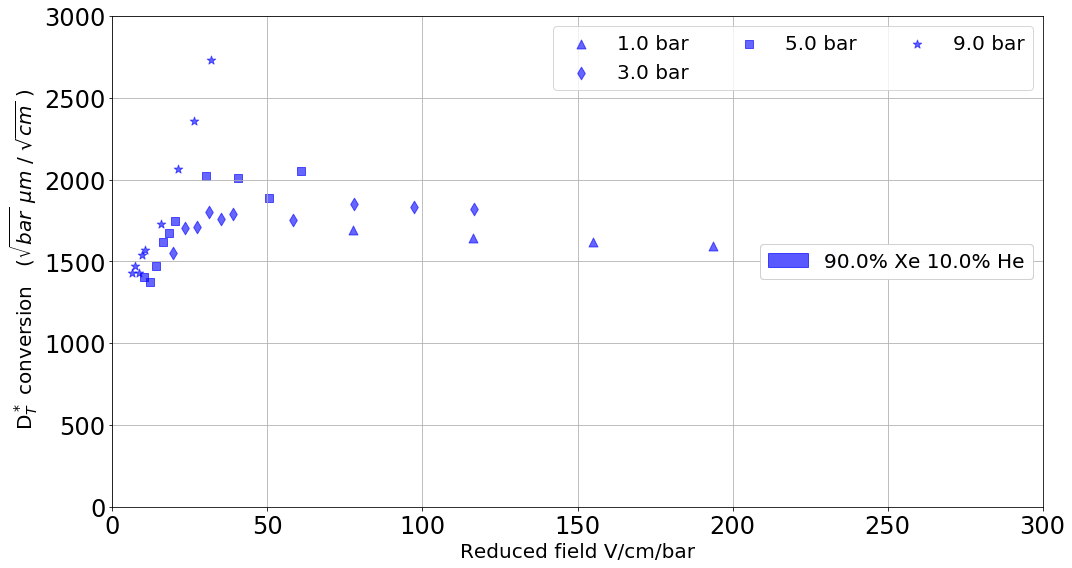

In [283]:
Pat = []
plt.figure(figsize=(15,8))
for x in range(0,len(Percents)):
#for x in [3]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 14.128
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    sigma = (vals[:,4]*1e6)**2
    
    V = d/(dt)
    R = E*.9767/P
    Dslash = sigma*V**3/(2*d)*1e6*P
    
    B = (.01/(sigma))**2+9*(0.5/dt)**2+4*(0.1/(d))**2+(0.1/(P))**2
    
    DeltaD = Dslash*np.sqrt((B))
    
    SORT = R.argsort()
    lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    #plt.plot(R[SORT], Dslash[SORT], alpha=0.6,color=color)
    #plt.errorbar(R, Dslash,yerr=DeltaD+Dslash*0.1, alpha=0.6,color=color,fmt='.')
    
    MBDX,MBDY,Yer,lab = MB_D(mm,x)
    MBTX,MBTY,Yer,lab = MB_DT(mm,x)
    CONVERT =MBDY/MBTY 
    DEX = []
    for q in range(0,len(R)):
        hold = find_nearest(MBDX,R[q])
        ll = np.where(MBDX==hold)[0][0]
        DEX.append(ll)
    DEX = np.array(DEX)
    
    #plt.plot(MBTX,MBTY,linewidth=3,alpha=0.5,color='r')
    #lb2 = mpatches.Patch(color='r', label='Magboltz',alpha=0.5)
    Dtrans = Dslash/CONVERT[DEX]
    Dtrans = np.sqrt(2*Dtrans/V)*10
    for x, y, m, L in zip(R, Dtrans, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 

        
#plt.errorbar(xdata,ydata,xerr=xerr,yerr=yerr,fmt='.',color='gold',alpha=0.8)
#lb1 = mpatches.Patch(color='gold', label='H Kusano et al',alpha=0.8)
#plt.plot(XX,YY,color='r',label="Magboltz",alpha=0.8)
   
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=3,fontsize=20)

#Pat.append(lb1)
#Pat.append(lb2)
legend1=plt.legend(handles=Pat,loc='center right',ncol=1,fontsize=20)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(0,300)#
#plt.xlim(0,60)
plt.ylim(0,3000)#
#plt.legend(loc='upper right',fontsize=14,ncol=3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel("Reduced field V/cm/bar",fontsize=20)
plt.ylabel(r" D$^*_T$ conversion   ($\sqrt{bar}$ $\mu m$ / $\sqrt{cm}$ )",fontsize=20)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/90XE10HE-diff-zoom"+".pdf")
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/90XE10HE-diffTTS"+".pdf")
#plt.axvline(13)
plt.show()

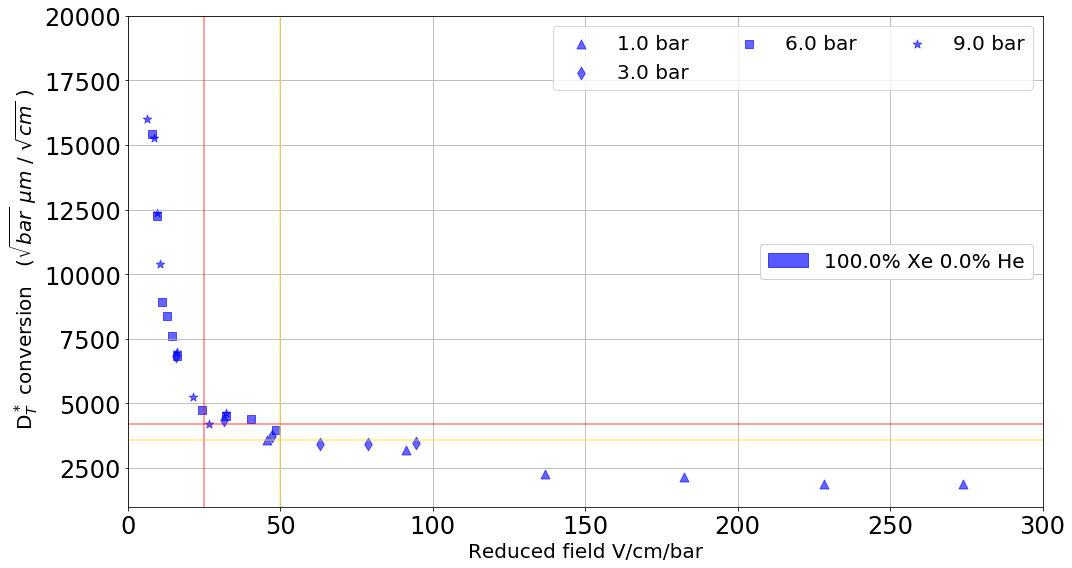

In [226]:
Pat = []
plt.figure(figsize=(15,8))
for x in range(0,len(Percents)):
#for x in [3]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 14.128
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    sigma = (vals[:,4]*1e6)**2
    
    V = d/(dt)
    R = E*.9767/P
    Dslash = sigma*V**3/(2*d)*1e6*P
    
    B = (.01/(sigma))**2+9*(0.5/dt)**2+4*(0.1/(d))**2+(0.1/(P))**2
    
    DeltaD = Dslash*np.sqrt((B))
    
    SORT = R.argsort()
    lab = str(Pc)+'% Xe '+str(100-Pc)+'% He'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    #plt.plot(R[SORT], Dslash[SORT], alpha=0.6,color=color)
    #plt.errorbar(R, Dslash,yerr=DeltaD+Dslash*0.1, alpha=0.6,color=color,fmt='.')
    
    MBDX,MBDY,Yer,lab = MB_D(mm,x)
    MBTX,MBTY,Yer,lab = MB_DT(mm,x)
    CONVERT =MBDY/MBTY 
    DEX = []
    for q in range(0,len(R)):
        hold = find_nearest(MBDX,R[q])
        ll = np.where(MBDX==hold)[0][0]
        DEX.append(ll)
    DEX = np.array(DEX)
    
    #plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color='r')
    #lb2 = mpatches.Patch(color='r', label='Magboltz',alpha=0.5)
    Dtrans = Dslash/CONVERT[DEX]
    Dtrans = np.sqrt(2*Dtrans/V)*10
    for x, y, m, L in zip(R, Dtrans, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 

        
#plt.errorbar(xdata,ydata,xerr=xerr,yerr=yerr,fmt='.',color='gold',alpha=0.8)
#lb1 = mpatches.Patch(color='gold', label='H Kusano et al',alpha=0.8)
#plt.plot(XX,YY,color='r',label="Magboltz",alpha=0.8)
   
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=3,fontsize=20)

#Pat.append(lb1)
#Pat.append(lb2)
legend1=plt.legend(handles=Pat,loc='center right',ncol=1,fontsize=20)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(0,300)#
#plt.xlim(0,60)
plt.ylim(1000,20000)#
#plt.legend(loc='upper right',fontsize=14,ncol=3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel("Reduced field V/cm/bar",fontsize=20)
plt.ylabel(r" D$^*_T$ conversion   ($\sqrt{bar}$ $\mu m$ / $\sqrt{cm}$ )",fontsize=20)
plt.tight_layout()
plt.axvline(25,color='r',alpha=0.5)
plt.axhline(4200,color='r',alpha=0.5)

plt.axvline(50,color='gold',alpha=0.5)
plt.axhline(3600,color='gold',alpha=0.5)
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/90XE10HE-diff-zoom"+".pdf")
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/100XE00HE-diffTTS"+".pdf")

plt.show()

In [183]:
MBDX

array([0.00000000e+00, 3.00030003e-02, 6.00060006e-02, ...,
       2.99939994e+02, 2.99969997e+02, 3.00000000e+02])

In [184]:
R

array([ 45.64018692,  91.28037383, 136.92056075, 182.56074766,
       228.20093458, 273.8411215 ,  15.75322581,  31.50645161,
        47.25967742,  63.01290323,  78.76612903,  94.51935484,
         8.0852649 ,   9.70231788,  11.31937086,  12.93642384,
        14.55347682,  16.1705298 ,  24.2557947 ,  32.3410596 ,
        40.4263245 ,  48.5115894 ,   5.34299781,   6.41159737,
         8.5487965 ,   9.61739606,  10.68599562,  16.02899344,
        21.37199125,  26.71498906,  32.05798687])

In [190]:
DEX = []
for q in range(0,len(R)):
    hold = find_nearest(MBDX,R[q])
    ll = np.where(MBDX==hold)[0][0]
    DEX.append(ll)
DEX = np.array(DEX)

In [191]:
Dslash/CONVERT[DEX]

array([6.21593810e+03, 5.39130515e+03, 2.94936228e+03, 2.78706865e+03,
       2.20072996e+03, 2.27343495e+03, 1.59042197e+04, 8.46875732e+03,
       6.64638378e+03, 5.83203131e+03, 6.04202746e+03, 6.37725142e+03,
       2.37489332e+04, 2.26122451e+04, 1.65522109e+04, 1.83765919e+04,
       1.75184719e+04, 1.56068751e+04, 9.23758195e+03, 8.85228625e+03,
       8.74275774e+03, 7.28520889e+03, 2.40458043e+06, 1.53021026e+04,
       2.54897651e+04, 2.19327249e+04, 1.97066820e+04, 1.65077352e+04,
       1.10019318e+04, 7.48262468e+03, 9.41400432e+03])

In [198]:
R

array([ 45.64018692,  91.28037383, 136.92056075, 182.56074766,
       228.20093458, 273.8411215 ,  15.75322581,  31.50645161,
        47.25967742,  63.01290323,  78.76612903,  94.51935484,
         8.0852649 ,   9.70231788,  11.31937086,  12.93642384,
        14.55347682,  16.1705298 ,  24.2557947 ,  32.3410596 ,
        40.4263245 ,  48.5115894 ,   5.34299781,   6.41159737,
         8.5487965 ,   9.61739606,  10.68599562,  16.02899344,
        21.37199125,  26.71498906,  32.05798687])

In [199]:
MBDX[DEX]

array([ 45.63456346,  91.26912691, 136.93369337, 182.56825683,
       228.20282028, 273.83738374,  15.75157516,  31.50315032,
        47.25472547,  63.00630063,  78.75787579,  94.50945095,
         8.07080708,   9.6909691 ,  11.31113111,  12.93129313,
        14.55145515,  16.17161716,  24.24242424,  32.34323432,
        40.4140414 ,  48.51485149,   5.34053405,   6.42064206,
         8.55085509,   9.6309631 ,  10.68106811,  16.02160216,
        21.36213621,  26.70267027,  32.04320432])

In [172]:
np.where(Dslash==max(Dslash))

(array([22]),)

In [173]:
R[22]

5.3429978118161925

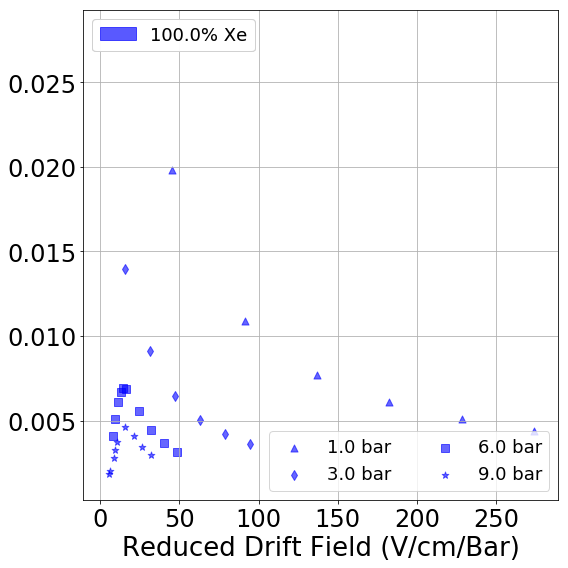

In [308]:
Pat = []
plt.figure(figsize=(8,8))
for x in range(0,len(Percents)):
#for x in [3]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 141.28
    P = vals[:,2]
    E = vals[:,1]
    dt = vals[:,3]*1e6
    V = d/(dt)
    V = V
    mu = V/(E*.9767)
    R = E*.9767/P
    Verr = V * np.sqrt((0.5/dt)**2+(0.1/(d))**2)
    lab = str(Pc)+'% Xe'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    #MBX,MBY,Yer,lab = MB_V(mm,x)
    #plt.plot(MBX,MBY,linewidth=3,alpha=0.5,color='r')
    #lb2 = mpatches.Patch(color='r', label='Magboltz',alpha=0.5)

    for x, y, m, L in zip(R, mu, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=50,label=L+" bar") 
    
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower right',ncol=2,fontsize=18)

#Pat.append(lb2)
legend1=plt.legend(handles=Pat,loc='upper left',ncol=1,fontsize=18)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


#plt.ylim(0,4)#
#plt.xlim(0,100)#
#plt.legend(loc='upper right',fontsize=14,ncol=3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
#plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/90XE10HE-VEL-zoom"+".pdf")
#plt.savefig("/Users/austinmcdonald/Desktop/GAS_controversy/100XE00HE-VEL"+".pdf")
plt.show()

NameError: name 'XX' is not defined

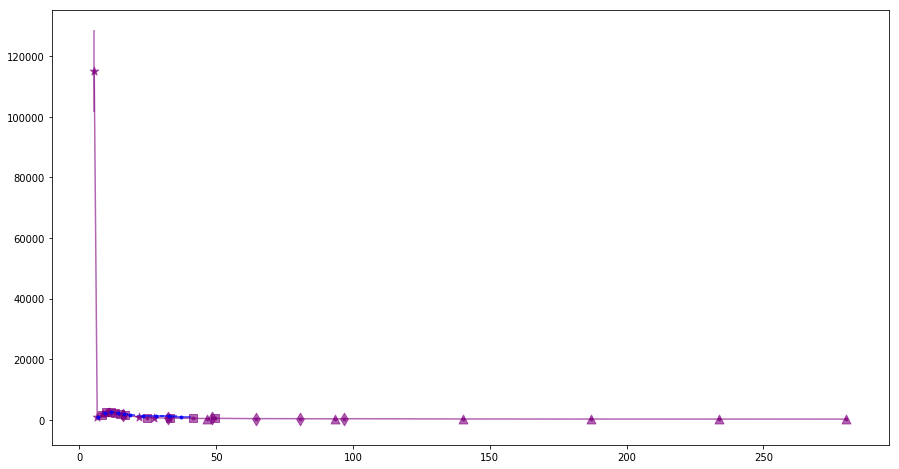

In [947]:
Pat = []
plt.figure(figsize=(15,8))
ax1 = plt.subplot(111)

#for x in range(0,len(Percents)):
for x in [2]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 13.48
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    sigma = (vals[:,4]*1e6)**2
    
    V = d/(dt)
    R = E/P
    Dslash = sigma*V**3/(2*d)*1e6*P
    
    B = (.1/(sigma))**2+9*(0.5/dt)**2+4*(0.1/(d))**2+(0.1/(P))**2
    
    DeltaD = Dslash*np.sqrt((B))
    
    SORT = R.argsort()
    lab = str(Pc)+'% Xe'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    plt.plot(R[SORT], Dslash[SORT], alpha=0.6,color=color)
    plt.errorbar(R, Dslash,yerr=DeltaD+Dslash*0.1, alpha=0.6,color=color,fmt='.')
    
    for x, y, m, L in zip(R, Dslash, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=80,label=L+" bar") 

        
plt.errorbar(xdata,ydata,xerr=xerr,yerr=yerr,fmt='.',color='blue',alpha=0.8)
lb1 = mpatches.Patch(color='blue', label='H Kusano et al',alpha=0.8)
plt.plot(XX,YY,color='r',alpha=0.8)
lb2 = mpatches.Patch(color='r', label='Magboltz',alpha=0.8)

#legend3=plt.legend(handles=[lb1,lb2],loc='upper center',ncol=5,fontsize=20)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=3,fontsize=20)
Pat.append(lb1)
Pat.append(lb2)
legend1=plt.legend(handles=Pat,loc='center right',ncol=1,fontsize=20)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
#plt.gca().add_artist(legend3)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
ax1.set_xlabel("Reduced field V/cm/bar",fontsize=20)
ax1.set_ylabel(r" D$_L$   (bar cm$^2$ / s )",fontsize=20)
plt.xlim(0,300)

ax2 = ax1.twiny()

# Decide the ticklabel position in the new x-axis,
# then convert them to the position in the old x-axis
N1 = 2.5e19
Td = 1e-17
N2 = P*N1
Townsend = (E/N2)/(Td)

newlabel = [0.0,0.05,0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]#[0,50,100,150,200,250,300] # labels of the xticklabels: the position in the new x-axis
k2degc = lambda t: (t*N1)*Td# convert function: from Kelvin to Degree Celsius
newpos   = [k2degc(t) for t in newlabel]   # position of the xticklabels in the old x-axis

ax2.set_xticks(newpos)
ax2.set_xticklabels(newlabel)

ax2.xaxis.set_tick_params(which='both',width=2,length=6)
#ax2.set_xscale("log", nonposx='clip')
#ax2.spines["bottom"].set_position(("axes", 0.1))
ax2.spines['bottom'].set_position(('outward', 60))# shift axis
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.set_xlabel('E/N Td',fontsize=20)
ax2.set_xlim(ax1.get_xlim())
plt.xticks(fontsize=20)

plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/DslashSTARBAR"+".png")
plt.show()

In [ ]:
newlabel

In [235]:
newpos

[0.0, 0.0008, 0.0016, 0.0024, 0.0032, 0.003999999999999999, 0.0048]

In [209]:
N1 = 2.5e19
Td = 1e-17
N2 = P*N1
Townsend = (E/N2)/(Td)

In [219]:
Townsend

array([0.38461538, 0.57692308, 0.76923077, 0.96153846, 1.15384615,
       0.10561056, 0.1320132 , 0.1980198 , 0.2640264 , 0.330033  ,
       0.3960396 , 0.05289256, 0.0661157 , 0.09917355, 0.1322314 ,
       0.16528926, 0.19834711, 0.03551609, 0.04439512, 0.06659267,
       0.08879023, 0.11098779, 0.13318535])

In [202]:
newpos

[0.0,
 19.999999999999996,
 39.99999999999999,
 59.99999999999999,
 79.99999999999999,
 99.99999999999999,
 119.99999999999999]

(-5.0, 105.0)

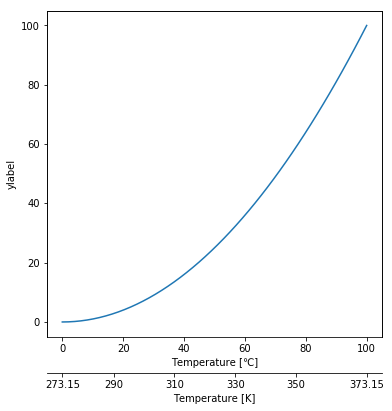

In [158]:
xx = np.linspace(0,100,50)
yy = (xx/10)**2
plt.figure(figsize=(6,6))
# Plot the data
ax1 = plt.subplot(111)
ax1.plot(xx,yy)
ax1.set_ylabel(r'ylabel')
ax1.set_xlabel(u'Temperature [\u2103]')

# Set scond x-axis
ax2 = ax1.twiny()

# Decide the ticklabel position in the new x-axis,
# then convert them to the position in the old x-axis
newlabel = [273.15,290,310,330,350,373.15] # labels of the xticklabels: the position in the new x-axis
k2degc = lambda t: t-273.15 # convert function: from Kelvin to Degree Celsius
newpos   = [k2degc(t) for t in newlabel]   # position of the xticklabels in the old x-axis

ax2.set_xticks(newpos)
ax2.set_xticklabels(newlabel)

ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 36))
ax2.set_xlabel('Temperature [K]')
ax2.set_xlim(ax1.get_xlim())


In [132]:
DeltaD+Dslash*0.5

array([ 169.98622881,  148.15876431,  139.97203927,  126.80986601,
        121.72763782,  335.5351339 ,  278.70842401,  220.66566573,
        197.99595203,  194.1007718 ,  186.33197193, 1081.53145204,
        781.77013228,  373.90083242,  297.25766449,  269.32882724,
        256.05370187, 1139.48450494, 1185.42084295,  836.71896724,
        475.69005756,  376.61866826,  323.87421421])

In [105]:
np.sqrt(B)

array([0.05002662, 0.05032384, 0.05060442, 0.05095296, 0.05128446,
       0.02019962, 0.020496  , 0.02112674, 0.02173159, 0.02225681,
       0.0229348 , 0.0123675 , 0.01316296, 0.0144557 , 0.01539457,
       0.01616292, 0.01681802, 0.0095557 , 0.01003759, 0.01168567,
       0.01296476, 0.01407176, 0.01512994])

In [106]:
Dslash

array([ 283.8385101 ,  246.9683788 ,  232.90234162,  210.39648861,
        201.40987468,  623.42092524,  516.86710603,  407.11193465,
        363.27290456,  354.528348  ,  338.18630762, 2068.32957449,
       1493.09946543,  708.46828574,  558.08503503,  501.77939417,
        474.01720883, 2196.90748955, 2284.32769648, 1607.60679277,
        905.63223561,  709.03432229,  603.0000401 ])

In [122]:
XXX = np.array([  2.81481481,   8.44444444,  11.25925926,  14.07407407,
        16.88888889,  16.88888889,  19.7037037 ,  22.51851852,
        25.33333333,  25.33333333,  25.33333333,  28.14814815,
        30.96296296,  33.77777778,  33.77777778,  36.59259259,
        39.40740741,  42.22222222,  50.66666667,  50.66666667,
        67.55555556,  76.        ,  76.        ,  84.44444444,
        92.88888889, 101.33333333, 101.33333333, 109.77777778,
       118.22222222, 126.66666667, 152.        , 177.33333333,
       202.66666667, 228.        , 253.33333333, 278.66666667,
       304.        , 329.33333333, 354.66666667])

YYY = np.array([1208.06192218, 2622.65751253, 2782.95341178, 2206.5801764 ,
       1937.13155241, 1786.7293096 , 1755.76267449, 1640.18762347,
       1554.09864953, 1286.00538177, 1255.35170092, 1466.20069551,
       1340.51979375, 1317.31597365, 1097.89365663, 1255.98052266,
       1216.46309979,  980.49761083,  944.75521303,  944.75548585,
        839.0146336 ,  852.51141004,  857.82787085,  788.13940045,
        762.72931377,  767.01193198,  748.96443736,  739.68335622,
        723.59901912,  684.07559719,  645.78502241,  606.08680087,
        623.39578972,  618.5271399 ,  592.71763353,  572.45328186,
        556.26782759,  552.70947142,  540.25919839])

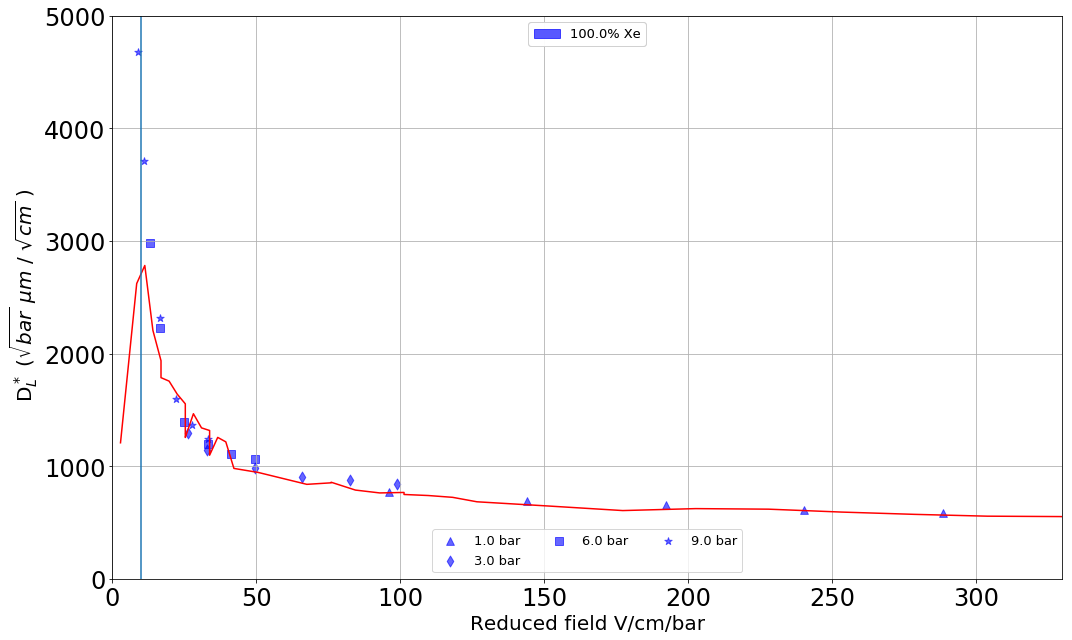

In [123]:
Pat = []
plt.figure(figsize=(15,9))
#for x in range(0,len(Percents)):
for x in [-1]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    
    d =14.128
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    sigma = (vals[:,4]*1e6)**2
    sigma = sigma
    V = d/(dt)
    V = V
    R = E/P 
    
    A = sigma*V**2*P*1e6/d
    B = (0.05/(2*sigma))**2+(0.5/dt)**2+(0.1/(2*d))**2+(0.1/(2*P))**2
    DeltaD = np.sqrt((A)*(B))
    
    
    Dslash = sigma*V**3/(2*d)*1e6*P
    Dstar  = np.sqrt(2*Dslash/V)*10
    SORT = R.argsort()
    lab = str(Pc)+'% Xe'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    #plt.errorbar(R,Dstar,yerr=DeltaD*100,marker=None,lins)
    #plt.plot(R[SORT], Dstar[SORT], alpha=0.6,color=color)
    for x, y, m, L in zip(R, Dstar, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=60,label=L+" bar") 
    
plt.plot(XXX,YYY,color='r')  
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower center',ncol=3,fontsize=13)

legend1=plt.legend(handles=Pat,loc='upper center',ncol=5,fontsize=13)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(0,330)#
#plt.xlim(0,50)

#plt.xlim(0,120)#
plt.ylim(0,5000)#plt.legend(loc='upper right',fontsize=14,ncol=3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel("Reduced field V/cm/bar",fontsize=20)
plt.ylabel(r" D$^*_L$ ($\sqrt{bar}$ $\mu m$ / $\sqrt{cm}$ )",fontsize=20)
plt.tight_layout()
plt.axvline(10)
#plt.savefig("/Users/austinmcdonald/Desktop/DslashSTARBAR"+".png")
plt.show()

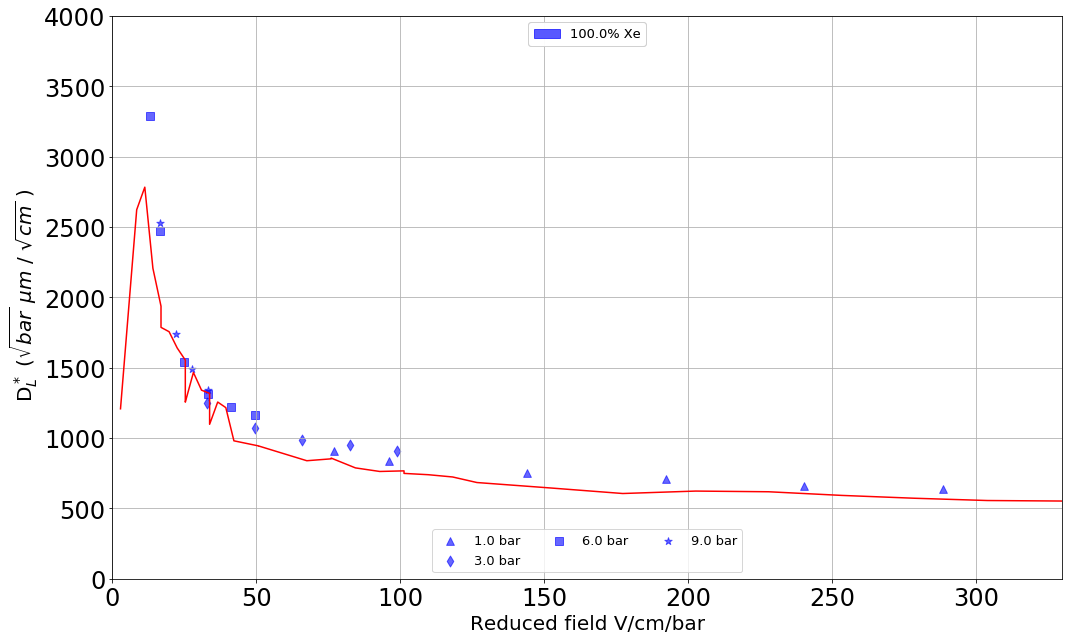

In [36]:
Pat = []
plt.figure(figsize=(15,9))
#for x in range(0,len(Percents)):
for x in [-1]:
    Pc = Percents[x]
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 13.48
    E = vals[:,1]
    P = vals[:,2]
    dt = vals[:,3]*1e6
    sigma = (vals[:,4]*1e6)**2-0.0125
    sigma = sigma
    V = d/(dt)
    V = V*1.075
    R = E/P 
    Dslash = sigma*V**3/(2*d)*1e6*P
    Dstar  = np.sqrt(2*Dslash/V)*10
    SORT = R.argsort()
    lab = str(Pc)+'% Xe'
    color = COL[x]
    pat = mpatches.Patch(color=color,    label=lab,alpha=0.6)
    Pat.append(pat)
    LABB = np.rint(P).astype(str)
    
    #plt.plot(R[SORT], Dstar[SORT], alpha=0.6,color=color)
    for x, y, m, L in zip(R, Dstar, mark,LABB):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=60,label=L+" bar") 
    
plt.plot(XXX,YYY,color='r')  
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
legend2=plt.legend(by_label.values(), by_label.keys(),loc='lower center',ncol=3,fontsize=13)

legend1=plt.legend(handles=Pat,loc='upper center',ncol=5,fontsize=13)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


plt.xlim(0,330)#
#plt.xlim(0,50)

#plt.xlim(0,120)#
plt.ylim(0,4000)#
#plt.legend(loc='upper right',fontsize=14,ncol=3)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()
plt.xlabel("Reduced field V/cm/bar",fontsize=20)
plt.ylabel(r" D$^*_L$ ($\sqrt{bar}$ $\mu m$ / $\sqrt{cm}$ )",fontsize=20)
plt.tight_layout()
#plt.savefig("/Users/austinmcdonald/Desktop/DslashSTARBAR"+".png")
plt.show()

In [64]:
P

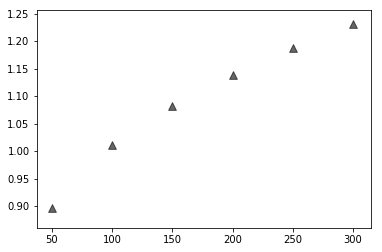

In [55]:
for Pc in [100]:
    DATA = Data[Data[:,0].astype(float)==Pc]
    vals = DATA[:,:-1].astype(float)
    mark = DATA[:,-1]
    d = 134.8
    V = d/(vals[:,3]*1e6)
    R = vals[:,1]/vals[:,2]
    
    #plt.scatter(R,V)
    
    for x, y, m in zip(R, V, mark):
        plt.scatter(x, y, alpha=0.6,marker=m,color='k',s=60) 
    
    

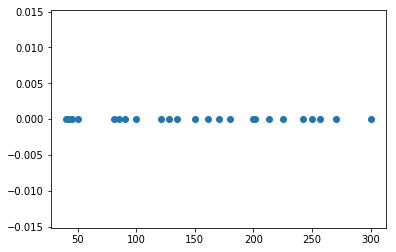

In [46]:
plt.scatter(vals[:,1]/vals[:,2],vals[:,4])

In [23]:
Data[Data[:,0]==80]

/Users/austinmcdonald/miniconda/envs/IC-3.6-2018-11-14/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


array([], shape=(0, 24, 6), dtype='<U32')

In [14]:
Data[:,0]

array(['80', '80', '80', '80', '80', '80', '85', '85', '85', '85', '85',
       '85', '90', '90', '90', '90', '90', '90', '100', '100', '100',
       '100', '100', '100'], dtype='<U32')

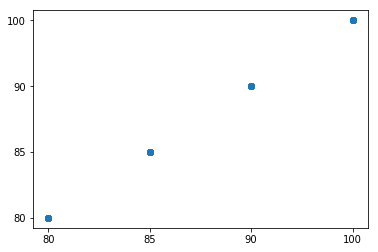

In [8]:
plt.scatter(Data[:,0],Data[:,0])